In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append('../')
from NeuralNetwork.tools import save_to_db, groupby, make_valid_df
from NeuralNetwork.neural_network import NeuralNetwork

In [3]:
list(os.walk('..'))

[('..',
  ['__pycache__',
   'Test',
   'NeuralNetwork',
   'architecture_models',
   '.ipynb_checkpoints',
   'saved_models',
   'By_dates',
   'Data',
   '.git'],
  ['Links.txt', 'New.txt', 'Интересно.txt', '.gitignore']),
 ('../__pycache__', [], ['neural_network.cpython-38.pyc']),
 ('../Test',
  ['.ipynb_checkpoints'],
  ['Test_4.ipynb',
   'Test_5&NeuralNetwork_7.ipynb',
   'Test_groupby.ipynb',
   'Test_6&NeuralNetwork_7.ipynb',
   'Test_1.ipynb',
   'Test_3.ipynb',
   'Test_2.ipynb']),
 ('../Test/.ipynb_checkpoints', [], ['Test_groupby-checkpoint.ipynb']),
 ('../NeuralNetwork',
  ['__pycache__', '.ipynb_checkpoints'],
  ['NeuralNetwork_1.ipynb',
   'NeuralNetwork_11_first_layer_tests.ipynb',
   'NeuralNetwork_8_and_group_by.ipynb',
   'NeuralNetwork_3.ipynb',
   'NeuralNetwork_2.ipynb',
   'NeuralNetwork_6.ipynb',
   'tools.py',
   '__init__.py',
   'neural_network.py',
   'NeuralNetwork_10_and_metrics.ipynb',
   'NeuralNetwork_7.ipynb',
   'NeuralNetwork_4.ipynb',
   'NeuralNetw

In [4]:
databases = [dir_path for dir_path in os.walk('..') if 'other.db' in dir_path[2]][0]
databases

('../Data/databases',
 [],
 ['model_metrics.db',
  'Aleksashina_Керов_Андрей.db',
  'clear_emotions.db',
  'other.db'])

In [5]:
df = pd.DataFrame()

In [6]:
data_dir = databases[0]
for db_file in databases[2]:
    if db_file in ['clear_emotions.db', 'model_metrics.db']:
        continue
    db_path = os.path.join(data_dir, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)

In [7]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.9878594,0.003336495,0.008397053,0.001824096,0.007600656,6.9452e-05,0.000141165,-0.005060558,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.9878824,0.003385304,0.008362157,0.001782566,0.007644675,8.0761e-05,0.000138702,-0.004976853,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.9879055,0.003434114,0.008327262,0.001741036,0.007688694,9.207e-05,0.00013624,-0.004893148,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.9879286,0.003482923,0.008292366,0.001699506,0.007732714,0.000103379,0.000133777,-0.004809443,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.9880258,0.003506238,0.008183754,0.00164466,0.00778434,0.000113112,0.000130297,-0.004677515,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.9315634,3.7894e-05,0.02397099,0.06796286,0.02635098,0.000250268,0.000691861,-0.06792496,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.9356429,3.1707e-05,0.0237766,0.06259692,0.02374056,0.000229404,0.000798602,-0.06256521,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.9384109,2.6894e-05,0.023437,0.05935737,0.02117987,0.000212627,0.000848645,-0.05933048,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.9407817,2.3125e-05,0.02303489,0.05651735,0.01901644,0.000197417,0.000877875,-0.05649422,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [8]:
pa_fields =     [
    'Valence',
    'Arousal'
]
seven_fields = [
    'Neutral', 
    'Happy', 
    'Sad', 
    'Angry', 
    'Surprised', 
    'Scared', 
    'Disgusted'
]

In [9]:
fields = seven_fields + pa_fields
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [10]:
make_valid_df(df, fields)

In [11]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [12]:
df_train, df_other = groupby(df, other=True)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.121_Керов Андрей_8,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:01.181_Керов Андрей_5,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:11.575_Боим_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:01:50.200_Балакин Владислав_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:08.000_Fomin_3,0.99,0.00,0.01,0.01,0.01,0.0,0.0,-0.01,0.25
...,...,...,...,...,...,...,...,...,...
00:00:17.500_Смолин Александр_1,0.02,0.96,0.00,0.00,0.00,0.0,0.0,0.96,0.90
00:00:20.900_Aleksashina_1,0.01,0.98,0.00,0.00,0.00,0.0,0.0,0.97,0.67
00:00:16.900_Смолин Александр_1,0.02,0.97,0.00,0.00,0.00,0.0,0.0,0.97,0.87


In [13]:
df_other

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.030_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.060_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.090_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.121_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.151_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
...,...,...,...,...,...,...,...,...,...
00:00:11.696_Fomin_6,0.05,0.93,0.0,0.0,0.00,0.0,0.0,0.93,0.78
00:00:04.060_Керов Андрей_2,0.04,0.94,0.0,0.0,0.00,0.0,0.0,0.94,0.53
00:00:11.878_Fomin_6,0.03,0.95,0.0,0.0,0.00,0.0,0.0,0.95,0.83


In [14]:
databases_dir = [dir_ for dir_ in list(os.walk('..')) if 'databases' in dir_[0]][0]
databases_dir

('../Data/databases',
 [],
 ['model_metrics.db',
  'Aleksashina_Керов_Андрей.db',
  'clear_emotions.db',
  'other.db'])

In [15]:
name_db = 'clear_emotions'
db_path = os.path.join(databases_dir[0], f'{name_db}.db')
db_path

'../Data/databases/clear_emotions.db'

In [16]:
connection = sqlite3.connect(db_path)
df_clear = pd.read_sql(f'select * from {name_db}', con=connection)
df_clear

,Index_,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
0,00:00:01.300_Смолин Александр_1,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
1,00:00:07.575_Керов Андрей_8,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
2,00:00:03.000_Боим_9,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
3,00:00:05.700_Provotorov_3,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
4,00:00:09.848_Korsakov_9,0.97,0.0,0.0,0.01,0.01,0.0,0.01,-0.01,0.3
...,...,...,...,...,...,...,...,...,...,...
525,00:00:07.700_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
526,00:00:08.200_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
527,00:00:07.300_Nasyrov_7,0.01,0.0,0.0,0.0,0.0,0.0,0.99,-0.99,0.62
528,00:00:08.900_Nasyrov_7,0.0,0.0,0.0,0.01,0.0,0.0,1.0,-1.0,0.63


In [17]:
make_valid_df(df_clear, fields)

In [18]:
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [19]:
df_clear = df_clear[fields]

In [20]:
df_clear

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:01.300_Смолин Александр_1,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:07.575_Керов Андрей_8,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:03.000_Боим_9,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:05.700_Provotorov_3,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:09.848_Korsakov_9,0.97,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.30
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [21]:
full_df_list = [df_train, df_clear]
percent_df_list = [df_other]

In [22]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields])

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [23]:
df_train, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:06.900_Provotorov_4,0.84,0.01,0.03,0.21,0.00,0.0,0.00,-0.22,0.25
00:01:26.900_Балакин Владислав_1,0.99,0.00,0.00,0.00,0.01,0.0,0.00,0.00,0.29
00:00:10.090_Korsakov_5,0.47,0.00,0.00,0.01,0.57,0.0,0.00,-0.01,0.68
00:00:56.700_Турчина Екатерина_1,0.95,0.10,0.00,0.00,0.00,0.0,0.00,0.10,0.31
00:00:04.151_Керов Андрей_4,0.92,0.00,0.04,0.09,0.00,0.0,0.00,-0.10,0.25
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [24]:
df_test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:01:30.500_Балакин Владислав_1,0.95,0.04,0.00,0.03,0.00,0.00,0.00,0.01,0.27
00:01:06.800_Балакин Владислав_1,0.89,0.09,0.00,0.07,0.00,0.00,0.00,0.02,0.28
00:00:07.787_Korsakov_3,0.97,0.00,0.00,0.01,0.01,0.00,0.01,-0.01,0.30
00:00:02.696_Korsakov_10,0.84,0.00,0.00,0.00,0.22,0.00,0.00,-0.00,0.46
00:00:07.600_Боим_4,0.88,0.00,0.02,0.04,0.02,0.04,0.00,-0.06,0.38
...,...,...,...,...,...,...,...,...,...
00:00:06.800_Zaharova_8,0.89,0.03,0.00,0.00,0.12,0.00,0.00,0.02,0.34
00:01:47.100_Бондаренко Денис_2,0.99,0.00,0.01,0.01,0.01,0.00,0.00,-0.01,0.25
00:00:11.300_Куликов Алексей_1,0.93,0.01,0.02,0.06,0.01,0.00,0.01,-0.07,0.28


In [25]:
from keras.models import Model
from keras.layers import Input, Dense

In [26]:
models = []

In [27]:
metrics = ['mean', 'norm', 'stat']

In [28]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [29]:
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + metrics)
df_metrics

,model,layer,N,mean,norm,stat


### "Трёхмерные" модели

In [30]:
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [33]:
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:06.900_Provotorov_4,0.84,0.01,0.03,0.21,0.00,0.0,0.00,-0.22,0.25
00:01:26.900_Балакин Владислав_1,0.99,0.00,0.00,0.00,0.01,0.0,0.00,0.00,0.29
00:00:10.090_Korsakov_5,0.47,0.00,0.00,0.01,0.57,0.0,0.00,-0.01,0.68
00:00:56.700_Турчина Екатерина_1,0.95,0.10,0.00,0.00,0.00,0.0,0.00,0.10,0.31
00:00:04.151_Керов Андрей_4,0.92,0.00,0.04,0.09,0.00,0.0,0.00,-0.10,0.25
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [32]:
models

[]

In [34]:
for i in range(6, 10):
    for j in range(2, 11):
        for k in range(2, 10):
            a = Input(shape=(2,))
            first = Dense(i, activation='relu')(a)
            second = Dense(j, activation='relu')(first)
            third = Dense(k, activation='relu')(second)
            b = Dense(7, activation='sigmoid')(third)
            model = Model(inputs=a, outputs=b)
            model.compile(optimizer='adam', loss='mse')
            nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)
            models.append((str(i)+'.'+str(j)+'.'+str(k), str(i)+'.'+str(j)+'.'+str(k), nn))
            print('fit', models[-1][0])
            nn.fit(df_train, epochs=20, batch_size=20)
            entry_dict = {'model': models[-1][0], 'layer': 'third', 'N': str(i)+'.'+str(j)+'.'+str(k)}
            entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
            df_metrics = df_metrics.append(entry_dict, ignore_index = True)
            print(entry_dict)

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


fit 6.2.2
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.1403
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0682
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0449
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0363
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0327
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0310
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0302
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0298
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0295
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0294
Epoch 11/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0294
Epoch 12/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0294
Epoch 13/20
916

916/916 [==============================] - 1s 2ms/step - loss: 0.0071
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0071
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0070
{'model': '6.2.6', 'layer': 'third', 'N': '6.2.6', 'mean': 0.058391392907919455, 'norm': 0.15898544598466569, 'stat': 0.32518572}
fit 6.2.7
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0745
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0146
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0121
Epoch 4/20
916/916 [==============================] - 1

916/916 [==============================] - 1s 2ms/step - loss: 0.0150
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0144
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0140
Epoch 9/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0136
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0107
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0093
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 14/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0090
Epoch 16/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0090
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0089
Epoch 18/20
916/916 [==========

916/916 [==============================] - 2s 2ms/step - loss: 0.0062
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0061
{'model': '6.3.7', 'layer': 'third', 'N': '6.3.7', 'mean': 0.0546857975293658, 'norm': 0.14967952916765126, 'stat': 0.3485415}
fit 6.3.8
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0698
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0212
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0137
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0121
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0111
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0094
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0087
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0082
Epoch 9/20
916/916 [==============================] - 2s 2ms/st

916/916 [==============================] - 1s 2ms/step - loss: 0.0073
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 14/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0071
Epoch 16/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0067
Epoch 19/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0065
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0064
{'model': '6.4.4', 'layer': 'third', 'N': '6.4.4', 'mean': 0.05799526270190751, 'norm': 0.15551780465199375, 'stat': 0.34747323}
fit 6.4.5
Epoch 1/20
916/916 [==============================] -

916/916 [==============================] - 1s 2ms/step - loss: 0.0140
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0105
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0086
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0077
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0074
Epoch 9/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0073
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0071
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0064
Epoch 14/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 15/20
916/916 [=============

916/916 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0074
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0074
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0074
{'model': '6.5.5', 'layer': 'third', 'N': '6.5.5', 'mean': 0.05712059499772916, 'norm': 0.16242781282894664, 'stat': 0.32619047}
fit 6.5.6
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0524
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0200
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0107
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0080
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0074
Epoch 6/20
916/916 [==============================] - 1s 2

916/916 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 9/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0089
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0088
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0087
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0087
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0086
Epoch 14/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0086
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0085
Epoch 16/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0085
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0085
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0085
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0085
Epoch 20/20
916/916 [========

Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0470
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0097
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0086
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0082
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0077
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0065
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0062
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 13/20
916/916 [====

916/916 [==============================] - 1s 2ms/step - loss: 0.0093
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0090
Epoch 16/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0089
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0088
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0087
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0086
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0086
{'model': '6.7.3', 'layer': 'third', 'N': '6.7.3', 'mean': 0.06238468929481176, 'norm': 0.17470315648971455, 'stat': 0.33055443}
fit 6.7.4
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0645
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0199
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0123
Epoch 4/20
916/916 [==============================] - 1s

916/916 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0074
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 9/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0066
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0065
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0065
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0064
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0064
Epoch 14/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0063
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0063
Epoch 16/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0063
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0062
Epoch 18/20
916/916 [==========

916/916 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0059
{'model': '6.8.4', 'layer': 'third', 'N': '6.8.4', 'mean': 0.05301996031667673, 'norm': 0.14570147945335926, 'stat': 0.34374872}
fit 6.8.5
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0658
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0199
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0151
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0126
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0110
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0090
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0087
Epoch 9/20
916/916 [==============================] - 2s 2ms/

916/916 [==============================] - 2s 2ms/step - loss: 0.0059
Epoch 12/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0059
Epoch 13/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0058
Epoch 14/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0058
Epoch 15/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0058
Epoch 16/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0057
Epoch 17/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0057
Epoch 18/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0057
Epoch 19/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0057
Epoch 20/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0057
{'model': '6.8.9', 'layer': 'third', 'N': '6.8.9', 'mean': 0.05311796532522412, 'norm': 0.14633558134805352, 'stat': 0.35859326}
fit 6.9.2
Epoch 1/20
916/916 [==============================] -

916/916 [==============================] - 1s 2ms/step - loss: 0.0176
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0143
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0108
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0095
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0094
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 9/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 11/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0090
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0090
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0088
Epoch 14/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0083
Epoch 15/20
916/916 [=============

916/916 [==============================] - 1s 2ms/step - loss: 0.0073
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0073
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0073
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0072
{'model': '6.10.2', 'layer': 'third', 'N': '6.10.2', 'mean': 0.05806451854615311, 'norm': 0.1598616597126206, 'stat': 0.32389015}
fit 6.10.3
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0629
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0096
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0080
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0077
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 6/20
916/916 [==============================] - 1s

Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0071
Epoch 9/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0067
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0064
Epoch 11/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0062
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 14/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0060
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 16/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 18/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0058
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 20/20
916/91

Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.1402
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0682
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0449
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0363
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0327
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0310
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0302
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0298
Epoch 9/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0295
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0294
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0294
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0294
Epoch 13/20
916/916 [====

916/916 [==============================] - 1s 1ms/step - loss: 0.0116
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0115
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0115
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0114
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0114
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0113
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0113
{'model': '7.2.8', 'layer': 'third', 'N': '7.2.8', 'mean': 0.07821274059821887, 'norm': 0.20918873656424294, 'stat': 0.36784735}
fit 7.2.9
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0527
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0139
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0098
Epoch 4/20
916/916 [==============================] - 1s

916/916 [==============================] - 1s 1ms/step - loss: 0.0088
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0085
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0083
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0079
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0077
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0077
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 18/20
916/916 [==========

916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
{'model': '7.3.9', 'layer': 'third', 'N': '7.3.9', 'mean': 0.05188139864497001, 'norm': 0.1434650840430835, 'stat': 0.3542067}
fit 7.4.2
Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0956
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0166
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0131
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0116
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0103
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0095
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0089
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0085
Epoch 9/20
916/916 [==============================] - 1s 1ms/st

916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
{'model': '7.4.6', 'layer': 'third', 'N': '7.4.6', 'mean': 0.05235803532640891, 'norm': 0.14538401769999598, 'stat': 0.35104614}
fit 7.4.7
Epoch 1/20
916/916 [==============================] -

916/916 [==============================] - 1s 1ms/step - loss: 0.0287
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0234
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0195
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0169
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0153
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0144
Epoch 9/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0137
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0132
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0128
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0126
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0124
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0123
Epoch 15/20
916/916 [=============

916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
{'model': '7.5.7', 'layer': 'third', 'N': '7.5.7', 'mean': 0.05339973798921843, 'norm': 0.14699195822678274, 'stat': 0.3498464}
fit 7.5.8
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0498
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0079
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0073
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0071
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0067
Epoch 6/20
916/916 [==============================] - 2s 2m

916/916 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 9/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0068
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0066
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0065
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0064
Epoch 14/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0063
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0062
Epoch 16/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0062
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 20/20
916/916 [========

Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0392
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0097
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0063
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 9/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 13/20
916/916 [====

916/916 [==============================] - 2s 2ms/step - loss: 0.0117
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 16/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0117
Epoch 17/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0117
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 20/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0116
{'model': '7.7.5', 'layer': 'third', 'N': '7.7.5', 'mean': 0.0669389029239564, 'norm': 0.1941512555872179, 'stat': 0.31298128}
fit 7.7.6
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0491
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0146
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0109
Epoch 4/20
916/916 [==============================] - 1s 2

916/916 [==============================] - 1s 2ms/step - loss: 0.0084
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0081
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0079
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0077
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0076
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0074
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0074
Epoch 14/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0073
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0073
Epoch 16/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0073
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 18/20
916/916 [==========

916/916 [==============================] - 1s 2ms/step - loss: 0.0066
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0065
{'model': '7.8.6', 'layer': 'third', 'N': '7.8.6', 'mean': 0.05612825847369772, 'norm': 0.1524013129150231, 'stat': 0.34056294}
fit 7.8.7
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0495
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0080
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0074
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0071
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0069
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0065
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0062
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 9/20
916/916 [==============================] - 2s 2ms/s

916/916 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 14/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 16/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 18/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0058
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0058
{'model': '7.9.3', 'layer': 'third', 'N': '7.9.3', 'mean': 0.053134417031741016, 'norm': 0.14686396504022572, 'stat': 0.36065134}
fit 7.9.4
Epoch 1/20
916/916 [==============================] 

916/916 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0071
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0067
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0056
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 11/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 12/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0055
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 14/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0055
Epoch 15/20
916/916 [=============

916/916 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0069
{'model': '7.10.4', 'layer': 'third', 'N': '7.10.4', 'mean': 0.059250942232097016, 'norm': 0.1606255593241761, 'stat': 0.32797438}
fit 7.10.5
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0690
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0174
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0098
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0088
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0086
Epoch 6/20
916/916 [==============================] - 2

Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0055
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0054
Epoch 11/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0054
Epoch 12/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0053
Epoch 13/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0053
Epoch 14/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0053
Epoch 15/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0052
Epoch 16/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0052
Epoch 17/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0052
Epoch 18/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0052
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0051
Epoch 20/20
916/91

Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0609
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0237
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0181
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0150
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0134
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0127
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0124
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0122
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0122
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0121
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 13/20
916/916 [====

916/916 [==============================] - 1s 1ms/step - loss: 0.0140
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0139
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0139
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0139
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0138
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0138
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0138
{'model': '8.3.2', 'layer': 'third', 'N': '8.3.2', 'mean': 0.07683314434623717, 'norm': 0.22568369943951355, 'stat': 0.37955347}
fit 8.3.3
Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0726
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0171
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0132
Epoch 4/20
916/916 [==============================] - 1s

916/916 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 18/20
916/916 [==========

916/916 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0074
{'model': '8.4.3', 'layer': 'third', 'N': '8.4.3', 'mean': 0.06114305927956468, 'norm': 0.16930561772918357, 'stat': 0.3237837}
fit 8.4.4
Epoch 1/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0604
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0134
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0121
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0102
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0079
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 9/20
916/916 [==============================] - 1s 1ms/s

916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
{'model': '8.4.8', 'layer': 'third', 'N': '8.4.8', 'mean': 0.05349229398981365, 'norm': 0.1479559553021744, 'stat': 0.3515359}
fit 8.4.9
Epoch 1/20
916/916 [==============================] - 2

916/916 [==============================] - 1s 1ms/step - loss: 0.0090
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0080
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0074
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 15/20
916/916 [=============

916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
{'model': '8.5.9', 'layer': 'third', 'N': '8.5.9', 'mean': 0.060953897712302606, 'norm': 0.16768204014309027, 'stat': 0.34176785}
fit 8.6.2
Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0797
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0247
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0191
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0165
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0154
Epoch 6/20
916/916 [==============================] - 1s 

916/916 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 20/20
916/916 [========

Epoch 1/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0792
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0219
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0189
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0140
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0101
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0091
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0086
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0083
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0081
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0080
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0078
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0077
Epoch 13/20
916/916 [====

916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
{'model': '8.7.7', 'layer': 'third', 'N': '8.7.7', 'mean': 0.054446520515862046, 'norm': 0.1502267017320455, 'stat': 0.34114298}
fit 8.7.8
Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0422
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0098
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0081
Epoch 4/20
916/916 [==============================] - 1s

916/916 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0062
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 18/20
916/916 [==========

916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0054
{'model': '8.8.8', 'layer': 'third', 'N': '8.8.8', 'mean': 0.05338467470535468, 'norm': 0.14709494055397132, 'stat': 0.38103527}
fit 8.8.9
Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0375
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0091
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0080
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 9/20
916/916 [==============================] - 1s 1ms/

916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
{'model': '8.9.5', 'layer': 'third', 'N': '8.9.5', 'mean': 0.05351613408830615, 'norm': 0.14625594714620022, 'stat': 0.35636267}
fit 8.9.6
Epoch 1/20
916/916 [==============================] -

916/916 [==============================] - 1s 1ms/step - loss: 0.0113
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0100
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0091
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0085
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0082
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0079
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0077
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0073
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 15/20
916/916 [=============

916/916 [==============================] - 1s 2ms/step - loss: 0.0087
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0087
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0087
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0086
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0086
{'model': '8.10.6', 'layer': 'third', 'N': '8.10.6', 'mean': 0.05911569774453164, 'norm': 0.17113320949981314, 'stat': 0.32831022}
fit 8.10.7
Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0520
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0094
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0078
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 6/20
916/916 [==============================] - 1

Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0298
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0295
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0294
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0294
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0294
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0294
Epoch 14/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0293
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0293
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0293
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0293
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0293
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0293
Epoch 20/20
916/91

Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0762
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0114
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0083
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 9/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 13/20
916/916 [====

916/916 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0066
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0064
{'model': '9.3.4', 'layer': 'third', 'N': '9.3.4', 'mean': 0.05724421420038139, 'norm': 0.15365344566361253, 'stat': 0.34805351}
fit 9.3.5
Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0692
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0167
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0123
Epoch 4/20
916/916 [==============================] - 1s

916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0064
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 16/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 18/20
916/916 [==========

916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
{'model': '9.4.5', 'layer': 'third', 'N': '9.4.5', 'mean': 0.05206408090651746, 'norm': 0.14495794319172808, 'stat': 0.347438}
fit 9.4.6
Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0804
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0271
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0151
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0083
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 9/20
916/916 [==============================] - 1s 2ms/st

916/916 [==============================] - 1s 1ms/step - loss: 0.0081
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0079
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0078
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0077
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0074
{'model': '9.5.2', 'layer': 'third', 'N': '9.5.2', 'mean': 0.05699390694024441, 'norm': 0.15935971579773342, 'stat': 0.32099652}
fit 9.5.3
Epoch 1/20
916/916 [==============================] -

916/916 [==============================] - 1s 1ms/step - loss: 0.0078
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 15/20
916/916 [=============

916/916 [==============================] - 1s 1ms/step - loss: 0.0293
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0293
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0293
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0293
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0293
{'model': '9.6.3', 'layer': 'third', 'N': '9.6.3', 'mean': 0.13774251336059284, 'norm': 0.37294974455813756, 'stat': 0.33896604}
fit 9.6.4
Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0537
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0095
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0084
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0080
Epoch 6/20
916/916 [==============================] - 1s 1

916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0057
Epoch 10/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0054
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0054
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0053
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0052
Epoch 20/20
916/916 [========

Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0537
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0093
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0077
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0074
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0070
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 13/20
916/916 [====

916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0056
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0055
{'model': '9.7.9', 'layer': 'third', 'N': '9.7.9', 'mean': 0.05095467611052655, 'norm': 0.14123366433628495, 'stat': 0.35297427}
fit 9.8.2
Epoch 1/20
916/916 [==============================] - 1s 1ms/step - loss: 0.1405
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0683
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0449
Epoch 4/20
916/916 [==============================] - 1s

916/916 [==============================] - 1s 1ms/step - loss: 0.0082
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0077
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0075
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 13/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0069
Epoch 14/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 18/20
916/916 [==========

916/916 [==============================] - 1s 2ms/step - loss: 0.0293
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0293
{'model': '9.9.2', 'layer': 'third', 'N': '9.9.2', 'mean': 0.13765258544573392, 'norm': 0.37261324764462656, 'stat': 0.33894137}
fit 9.9.3
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0595
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0142
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0125
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0122
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0120
Epoch 6/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0120
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0119
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0118
Epoch 9/20
916/916 [==============================] - 1s 2ms/

916/916 [==============================] - 2s 2ms/step - loss: 0.0058
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 14/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 15/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 16/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 19/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0056
{'model': '9.9.7', 'layer': 'third', 'N': '9.9.7', 'mean': 0.0515856315621703, 'norm': 0.1439044089942505, 'stat': 0.34900478}
fit 9.9.8
Epoch 1/20
916/916 [==============================] - 2

Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0119
Epoch 4/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0116
Epoch 5/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0097
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 7/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0071
Epoch 9/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0069
Epoch 11/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0067
Epoch 12/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0066
Epoch 13/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0063
Epoch 14/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0062
Epoch 15/20
916/916 [==

916/916 [==============================] - 2s 2ms/step - loss: 0.0056
Epoch 17/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0056
Epoch 18/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0056
Epoch 19/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0056
Epoch 20/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0055
{'model': '9.10.8', 'layer': 'third', 'N': '9.10.8', 'mean': 0.05199402616828493, 'norm': 0.14409498557432057, 'stat': 0.34720927}
fit 9.10.9
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0389
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0082
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0073
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0071
Epoch 6/20
916/916 [==============================] - 2

In [156]:
# for i in range(1, 9):
#     df_metrics.at[i, 'N'] = i + 1

In [35]:
df_metrics

,model,layer,N,mean,norm,stat
0,6.2.2,third,6.2.2,0.137588,0.372505,0.338931
1,6.2.3,third,6.2.3,0.062971,0.175059,0.324082
2,6.2.4,third,6.2.4,0.071391,0.206440,0.343289
3,6.2.5,third,6.2.5,0.064195,0.172972,0.331256
4,6.2.6,third,6.2.6,0.058391,0.158985,0.325186
...,...,...,...,...,...,...
283,9.10.5,third,9.10.5,0.053820,0.147042,0.350088
284,9.10.6,third,9.10.6,0.052137,0.143601,0.348921
285,9.10.7,third,9.10.7,0.051378,0.141924,0.352204
286,9.10.8,third,9.10.8,0.051994,0.144095,0.347209


In [36]:
len(models)

288

In [37]:
df_metrics['N']

0       6.2.2
1       6.2.3
2       6.2.4
3       6.2.5
4       6.2.6
        ...  
283    9.10.5
284    9.10.6
285    9.10.7
286    9.10.8
287    9.10.9
Name: N, Length: 288, dtype: object

In [140]:
df_metrics.sort_values(by=['norm'])[:50]

,model,layer,N,mean,norm,stat
253,9.6.7,third,9.6.7,0.050416,0.139019,0.354406
254,9.6.8,third,9.6.8,0.050386,0.139357,0.392956
143,7.10.9,third,7.10.9,0.050654,0.139693,0.371961
71,6.10.9,third,6.10.9,0.050951,0.139834,0.343409
206,8.9.8,third,8.9.8,0.051052,0.140405,0.363628
215,8.10.9,third,8.10.9,0.050880,0.140440,0.363934
214,8.10.8,third,8.10.8,0.050540,0.140494,0.366824
141,7.10.7,third,7.10.7,0.050636,0.140505,0.347470
133,7.9.7,third,7.9.7,0.051187,0.140624,0.358597
202,8.9.4,third,8.9.4,0.051154,0.141142,0.357687


In [153]:
def count_freq(df_):
    freq = {}
    for el in df_:
        if el not in freq:
            freq[el] = 0
        freq[el] += 1
    return freq

In [176]:
l = df_metrics.sort_values(by=['norm'])[:5]['N'].apply(lambda x: int(x.split('.')[2]))
count_freq(l)

{7: 1, 8: 2, 9: 2}

In [136]:
models[120]

('7.8.2',
 '7.8.2',
 <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa920493160>)

In [137]:
models[120][2].statistics(test)

,min_Neutral,max_Neutral,mean_abs_Neutral,min_Happy,max_Happy,mean_abs_Happy,min_Sad,max_Sad,mean_abs_Sad,min_Angry,...,mean_abs_Angry,min_Surprised,max_Surprised,mean_abs_Surprised,min_Scared,max_Scared,mean_abs_Scared,min_Disgusted,max_Disgusted,mean_abs_Disgusted
0,-0.399617,0.751406,0.079208,-0.544033,0.081309,0.026127,-0.838662,0.135061,0.034629,-0.571777,...,0.048886,-0.996275,0.0141,0.033087,-0.550826,0.010789,0.00682,-0.556499,0.435091,0.032746


In [138]:
models[120][2].predict(df_clear.sort_values('Sad')[-14:])

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:09.100_Zaharova_3,0.154263,0.027533,0.122243,0.501528,0.004562,0.001890,0.343345
00:00:04.500_Zaharova_3,0.149521,0.027999,0.120678,0.501007,0.004702,0.001980,0.346675
00:00:09.300_Zaharova_3,0.139014,0.028605,0.120776,0.509231,0.005703,0.002667,0.361864
00:00:03.500_Zaharova_3,0.139301,0.028677,0.120108,0.507301,0.005548,0.002555,0.360089
00:00:09.400_Zaharova_3,0.134219,0.028972,0.120290,0.511798,0.006144,0.002991,0.368132
00:00:03.600_Zaharova_3,0.129863,0.029424,0.119077,0.512243,0.006420,0.003200,0.372465
00:00:09.600_Zaharova_3,0.129565,0.029343,0.119806,0.514365,0.006618,0.003354,0.374445
00:00:03.700_Zaharova_3,0.120975,0.030189,0.118053,0.517182,0.007428,0.004008,0.385010
00:00:04.400_Zaharova_3,0.116817,0.030606,0.117315,0.518975,0.007913,0.004418,0.390700


In [178]:
models[120][2].predict(df_clear).max()

Neutral      0.988476
Happy        0.931990
Sad          0.122243
Angry        0.543331
Surprised    0.014333
Scared       0.011054
Disgusted    0.441145
dtype: float32

In [74]:
models[208]

('8.10.2',
 '8.10.2',
 <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa880fbdbe0>)

In [75]:
models[208][2].statistics(test)

,min_Neutral,max_Neutral,mean_abs_Neutral,min_Happy,max_Happy,mean_abs_Happy,min_Sad,max_Sad,mean_abs_Sad,min_Angry,...,mean_abs_Angry,min_Surprised,max_Surprised,mean_abs_Surprised,min_Scared,max_Scared,mean_abs_Scared,min_Disgusted,max_Disgusted,mean_abs_Disgusted
0,-0.41133,0.744823,0.078074,-0.557434,0.092705,0.016711,-0.825613,0.133755,0.033432,-0.568056,...,0.049905,-0.996275,0.006849,0.032969,-0.550609,0.013466,0.006866,-0.610394,0.383412,0.031544


In [116]:
models[208][2].predict(df_clear.sort_values('Sad')[-14:])

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:09.100_Zaharova_3,0.124167,0.022845,0.109823,0.499852,0.001045,0.003712,0.311597
00:00:04.500_Zaharova_3,0.160096,0.018795,0.121746,0.498287,0.001741,0.006046,0.313420
00:00:09.300_Zaharova_3,0.112247,0.023629,0.111924,0.515619,0.001665,0.004816,0.332056
00:00:03.500_Zaharova_3,0.134804,0.020773,0.118905,0.511358,0.002079,0.006187,0.328907
00:00:09.400_Zaharova_3,0.108501,0.023896,0.112632,0.520870,0.001945,0.005251,0.339025
00:00:03.600_Zaharova_3,0.128471,0.020975,0.121127,0.521436,0.002899,0.007541,0.342529
00:00:09.600_Zaharova_3,0.104866,0.024166,0.113343,0.526115,0.002272,0.005727,0.346063
00:00:03.700_Zaharova_3,0.122393,0.021178,0.123386,0.531496,0.004041,0.009190,0.356416
00:00:04.400_Zaharova_3,0.127354,0.020341,0.127162,0.535032,0.005155,0.011068,0.362301


In [180]:
models[208][2].predict(df_clear).max()

Neutral      0.984692
Happy        0.942482
Sad          0.131847
Angry        0.554947
Surprised    0.007671
Scared       0.014520
Disgusted    0.386585
dtype: float32

In [134]:
models[208][2].predict(df_clear.sort_values('Sad')[-14:])['Sad'].max()

0.12833112

In [76]:
models[211]

('8.10.5',
 '8.10.5',
 <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa86d6c7d30>)

In [77]:
models[211][2].statistics(test)

,min_Neutral,max_Neutral,mean_abs_Neutral,min_Happy,max_Happy,mean_abs_Happy,min_Sad,max_Sad,mean_abs_Sad,min_Angry,...,mean_abs_Angry,min_Surprised,max_Surprised,mean_abs_Surprised,min_Scared,max_Scared,mean_abs_Scared,min_Disgusted,max_Disgusted,mean_abs_Disgusted
0,-0.436514,0.746656,0.079365,-0.558298,0.116968,0.017071,-0.806898,0.146572,0.034811,-0.567691,...,0.04741,-0.996275,0.006535,0.032948,-0.550766,0.008794,0.006768,-0.606328,0.398043,0.031199


In [135]:
models[211][2].predict(df_clear.sort_values('Sad')[-14:])['Sad'].max()

0.14720607

In [181]:
models[211][2].predict(df_clear).max()

Neutral      0.971317
Happy        0.906909
Sad          0.148008
Angry        0.535595
Surprised    0.007729
Scared       0.009427
Disgusted    0.408667
dtype: float32

In [90]:
models[197]

('8.8.7',
 '8.8.7',
 <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa88ff71670>)

In [112]:
models[197][2].statistics(test)

,min_Neutral,max_Neutral,mean_abs_Neutral,min_Happy,max_Happy,mean_abs_Happy,min_Sad,max_Sad,mean_abs_Sad,min_Angry,...,mean_abs_Angry,min_Surprised,max_Surprised,mean_abs_Surprised,min_Scared,max_Scared,mean_abs_Scared,min_Disgusted,max_Disgusted,mean_abs_Disgusted
0,-0.436978,0.748499,0.078087,-0.559166,0.089458,0.013681,-0.880022,0.109746,0.031662,-0.557841,...,0.051716,-0.838362,0.559384,0.027189,-0.524157,0.032945,0.010297,-0.631923,0.396995,0.029211


In [113]:
models[197][2].predict(df_clear.sort_values('Sad')[-14:])

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:09.100_Zaharova_3,0.121638,2.623940e-09,0.091141,0.471929,2.327318e-08,0.013384,0.378698
00:00:04.500_Zaharova_3,0.148504,1.275284e-09,0.086529,0.457864,1.438289e-08,0.010633,0.366029
00:00:09.300_Zaharova_3,0.110648,1.493648e-09,0.087265,0.480568,1.222496e-08,0.011959,0.376335
00:00:03.500_Zaharova_3,0.128120,1.070010e-09,0.085241,0.469956,1.034832e-08,0.010602,0.368903
00:00:09.400_Zaharova_3,0.107182,1.237883e-09,0.086006,0.483450,9.863852e-09,0.011518,0.375548
00:00:03.600_Zaharova_3,0.122125,7.108295e-10,0.082598,0.474650,6.625650e-09,0.009716,0.366605
00:00:09.600_Zaharova_3,0.103812,1.025918e-09,0.084764,0.486334,7.958746e-09,0.011093,0.374762
00:00:03.700_Zaharova_3,0.116373,4.722167e-10,0.080030,0.479348,4.242139e-09,0.008903,0.364313
00:00:04.400_Zaharova_3,0.119586,3.424749e-10,0.078123,0.477982,3.202073e-09,0.008170,0.360600


In [182]:
models[197][2].predict(df_clear).max()

Neutral      0.996094
Happy        0.927986
Sad          0.091294
Angry        0.531717
Surprised    0.682820
Scared       0.031180
Disgusted    0.385753
dtype: float32

In [120]:
models[253]

('9.6.7',
 '9.6.7',
 <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa840819e80>)

In [121]:
models[253][2].statistics(df_clear)

,min_Neutral,max_Neutral,mean_abs_Neutral,min_Happy,max_Happy,mean_abs_Happy,min_Sad,max_Sad,mean_abs_Sad,min_Angry,...,mean_abs_Angry,min_Surprised,max_Surprised,mean_abs_Surprised,min_Scared,max_Scared,mean_abs_Scared,min_Disgusted,max_Disgusted,mean_abs_Disgusted
0,-0.262985,0.525713,0.055678,-0.108185,0.034865,0.014156,-0.851989,0.102627,0.038489,-0.444855,...,0.076776,-0.871082,0.322042,0.025389,-0.496755,0.065372,0.014759,-0.684276,0.447782,0.072222


In [130]:
models[253][2].predict(df_clear.sort_values('Sad')[-14:])

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:09.100_Zaharova_3,0.181268,0.001078,0.083918,0.513659,0.000031,0.020403,0.290536
00:00:04.500_Zaharova_3,0.215739,0.002273,0.095528,0.402469,0.000012,0.011943,0.418906
00:00:09.300_Zaharova_3,0.167116,0.001050,0.084976,0.519801,0.000023,0.020390,0.320093
00:00:03.500_Zaharova_3,0.190000,0.001683,0.091915,0.448428,0.000013,0.014600,0.394377
00:00:09.400_Zaharova_3,0.162600,0.001040,0.085332,0.521847,0.000021,0.020386,0.330291
00:00:03.600_Zaharova_3,0.182425,0.001733,0.093407,0.445405,0.000010,0.014113,0.424690
00:00:09.600_Zaharova_3,0.158182,0.001031,0.085688,0.523893,0.000019,0.020382,0.340652
00:00:03.700_Zaharova_3,0.175086,0.001785,0.094919,0.442387,0.000008,0.013642,0.455579
00:00:04.400_Zaharova_3,0.179413,0.002137,0.098324,0.416347,0.000006,0.011926,0.499521


In [185]:
models[253][2].predict(df_clear).max()

Neutral      0.983495
Happy        0.940344
Sad          0.102627
Angry        0.669330
Surprised    0.802557
Scared       0.172595
Disgusted    0.554978
dtype: float32

In [126]:
models[254]

('9.6.8',
 '9.6.8',
 <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa849267940>)

In [186]:
models[254][2].predict(df_clear).max()

Neutral      0.967498
Happy        0.937298
Sad          0.124065
Angry        0.730126
Surprised    0.824604
Scared       0.415297
Disgusted    0.637826
dtype: float32

In [127]:
models[254][2].statistics(df_clear)

,min_Neutral,max_Neutral,mean_abs_Neutral,min_Happy,max_Happy,mean_abs_Happy,min_Sad,max_Sad,mean_abs_Sad,min_Angry,...,mean_abs_Angry,min_Surprised,max_Surprised,mean_abs_Surprised,min_Scared,max_Scared,mean_abs_Scared,min_Disgusted,max_Disgusted,mean_abs_Disgusted
0,-0.342424,0.490162,0.049572,-0.062706,0.046519,0.015334,-0.85115,0.113695,0.040035,-0.388969,...,0.072024,-0.783706,0.344112,0.024141,-0.383374,0.027408,0.006193,-0.833058,0.450491,0.061897


In [128]:
models[254][2].predict(df_clear.sort_values('Sad')[-14:])

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:09.100_Zaharova_3,0.080584,5.833996e-23,0.108062,0.595020,5.598993e-09,0.016756,0.235856
00:00:04.500_Zaharova_3,0.130583,2.675772e-22,0.124065,0.400347,7.873389e-10,0.001598,0.488862
00:00:09.300_Zaharova_3,0.070070,9.790583e-24,0.106176,0.620297,2.137790e-09,0.013526,0.246391
00:00:03.500_Zaharova_3,0.097421,3.173196e-23,0.116659,0.518711,8.238236e-10,0.003787,0.384081
00:00:09.400_Zaharova_3,0.066857,5.400359e-24,0.105553,0.628587,1.550904e-09,0.012592,0.249972
00:00:03.600_Zaharova_3,0.093426,1.486402e-23,0.115477,0.473406,3.383662e-10,0.002099,0.434151
00:00:09.600_Zaharova_3,0.063781,2.978791e-24,0.104934,0.636801,1.125132e-09,0.011722,0.253587
00:00:03.700_Zaharova_3,0.089578,6.962613e-24,0.114307,0.428535,1.389749e-10,0.001163,0.485602
00:00:04.400_Zaharova_3,0.100968,1.373486e-23,0.109927,0.300444,6.767557e-11,0.000425,0.560491


In [189]:
models[143][2].predict(df_clear).max()

Neutral      0.993581
Happy        0.923687
Sad          0.187532
Angry        0.845664
Surprised    0.764002
Scared       0.060451
Disgusted    0.568246
dtype: float32

In [195]:
models[71][2].predict(df_clear).max()

array([0.97579265, 0.95661634, 0.13167915, 0.5673673 , 0.8602447 ,
       0.02486759, 0.39080977], dtype=float32)

In [191]:
models[206][2].predict(df_clear).max()

Neutral      0.967273
Happy        0.922493
Sad          0.154884
Angry        0.700593
Surprised    0.790319
Scared       0.026163
Disgusted    0.579727
dtype: float32

In [193]:
df_clear.columns[:-2]

Index(['Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted'], dtype='object')

In [198]:
best_models = [208, 211, 120, 197, 254, 253]

In [199]:
x = df_clear.columns[:-2]

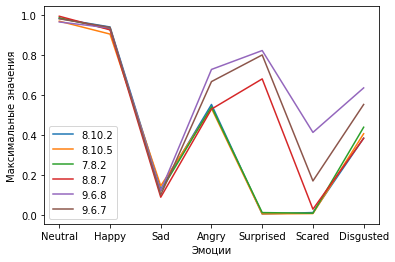

In [202]:
for i in best_models:
    plt.plot(x, models[i][2].predict(df_clear).max().values, label=models[i][0])
plt.xlabel("Эмоции")
plt.ylabel("Максимальные значения")
plt.legend()
plt.show()

In [323]:
x

Index(['Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted'], dtype='object')

In [340]:
set(df_metrics.sort_values(by=['norm'])[:50].index).intersection(set(best_models))

{197, 253, 254}

In [355]:
best_models[:3]

[208, 211, 120]

In [358]:
set(best_models[:3]).intersection(set(df_metrics.sort_values(by=['stat'])[:10].index))

{120, 208, 211}

In [370]:
df_clear_metrics = pd.DataFrame(columns = ['model'] + list(x) + metrics)
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,mean,norm,stat


In [348]:
# best_models[:3] + list(df_metrics.sort_values(by=['norm'])[:50].index)

In [367]:
best_models_sort = [set(df_metrics.sort_values(by=[metric])[:50].index) for metric in metrics]
best_models_sort = set(best_models_sort[0]).union(*best_models_sort[1:])
# best_models_sort

In [366]:
len(best_models_sort)

103

In [372]:
df_metrics.iloc[1]

model       6.2.3
layer       third
N           6.2.3
mean     0.062971
norm     0.175059
stat     0.324082
Name: 1, dtype: object

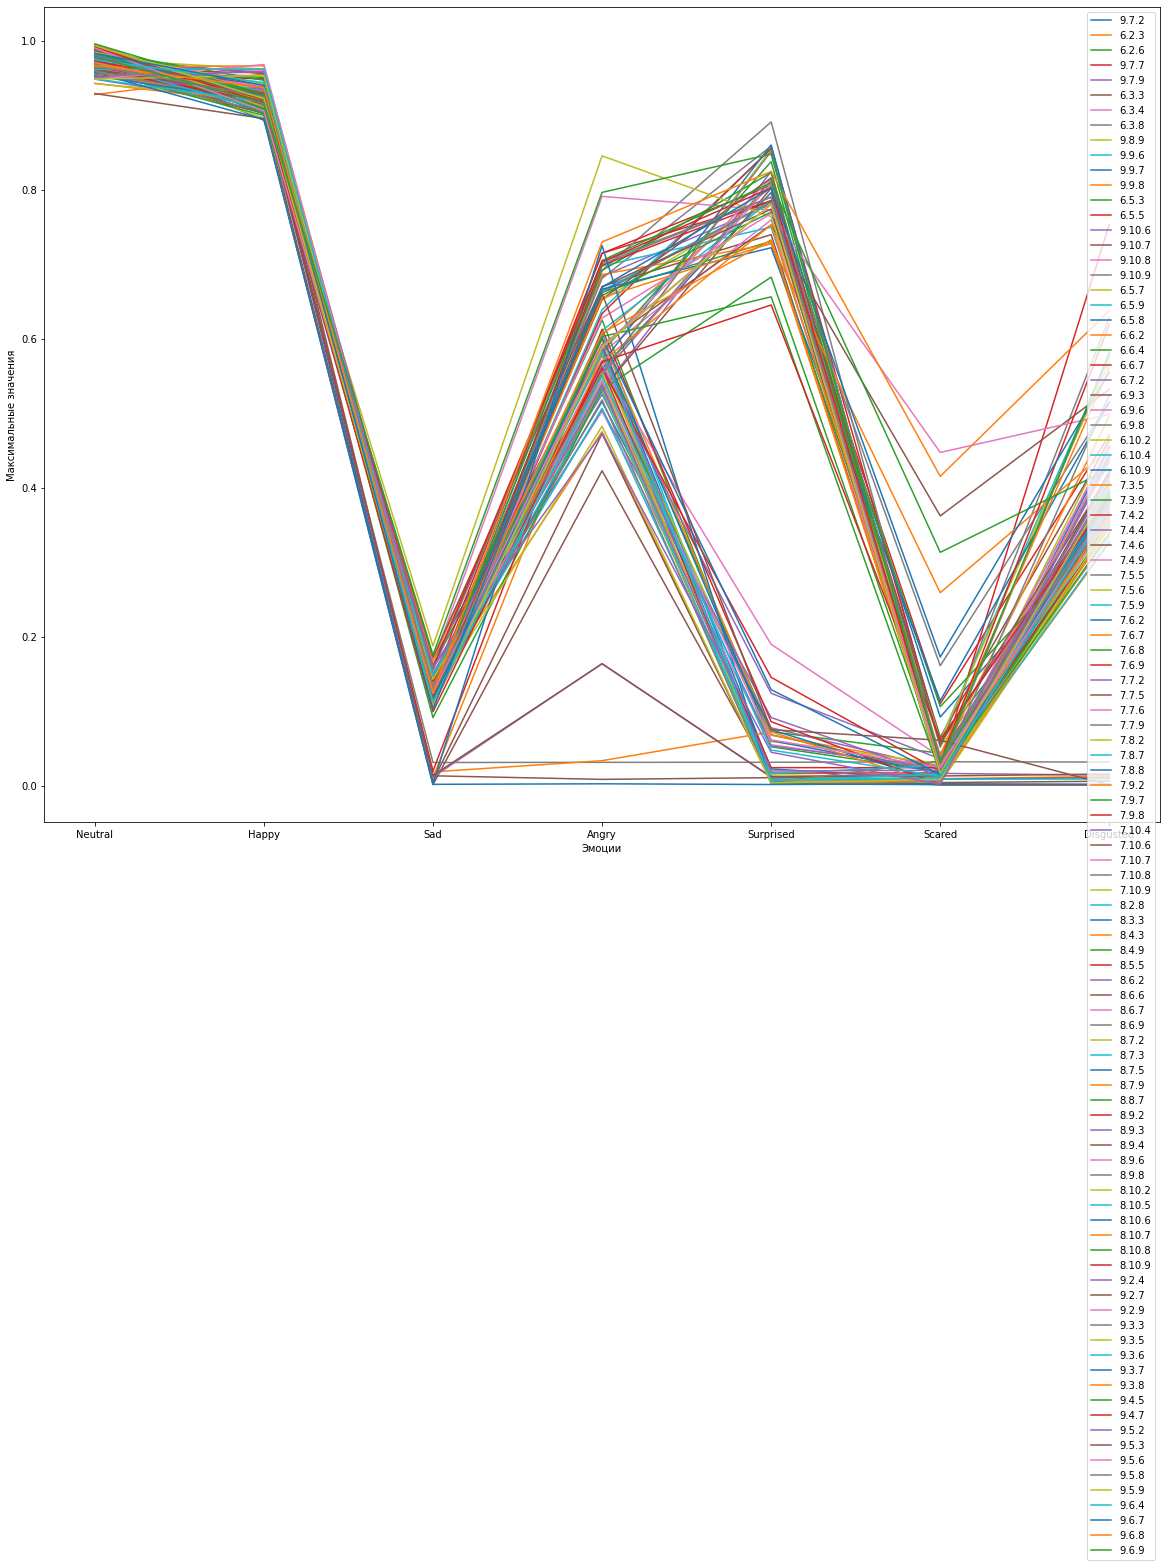

In [373]:
plt.figure(figsize=(20, 15))
for i in best_models_sort:
    values = models[i][2].predict(df_clear).max().values
    plt.plot(x, values, label=models[i][0])
    entry_dict = {'model': models[i][0]}
    entry_dict.update({metric: df_metrics.iloc[i][metric] for metric in metrics})
    entry_dict.update({emotion: values[j] for j, emotion in enumerate(x)})
    df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
plt.xlabel("Эмоции")
plt.ylabel("Максимальные значения")
plt.legend()
plt.show()

In [381]:
df_clear_metrics.sort_values('stat')[30:40]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,mean,norm,stat
89,9.3.6,0.961710,0.962105,0.117271,0.582350,0.006612,0.015289,0.389558,0.061345,0.168894,0.326113
21,6.6.2,0.955223,0.923593,0.010677,0.579935,0.009324,0.009224,0.012220,0.055746,0.165186,0.326185
13,6.5.5,0.952739,0.949657,0.121294,0.560909,0.016713,0.017005,0.394262,0.057121,0.162428,0.326190
38,7.5.6,0.942629,0.922295,0.126012,0.564554,0.059296,0.029513,0.357791,0.061393,0.168072,0.326604
73,8.9.2,0.962152,0.918583,0.019572,0.612856,0.085735,0.001400,0.001121,0.061258,0.172503,0.326763
25,6.9.3,0.984796,0.937874,0.013104,0.008302,0.010608,0.008623,0.010556,0.067190,0.204588,0.326836
69,8.7.3,0.949114,0.917922,0.126104,0.506689,0.016221,0.026795,0.394597,0.056950,0.160440,0.326878
29,6.10.4,0.959091,0.909585,0.121980,0.607451,0.008704,0.008715,0.008754,0.056118,0.160981,0.327152
12,6.5.3,0.967371,0.947930,0.122256,0.551379,0.068260,0.017474,0.347244,0.057991,0.158568,0.327209
90,9.3.7,0.980606,0.926534,0.114784,0.601173,0.128741,0.014770,0.387822,0.058702,0.157873,0.327413


In [421]:
best_models = set()

In [420]:
df_clear_metrics.sort_values('Scared')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,mean,norm,stat
95,9.5.3,0.988857,0.921005,0.118003,0.660735,0.075102,0.060767,0.000848,0.055570,0.157173,0.327781
49,7.8.7,0.989357,0.925310,0.112902,0.697790,0.749906,0.061434,0.575871,0.052429,0.144682,0.367822
93,9.4.7,0.991911,0.916810,0.099230,0.569186,0.645487,0.061706,0.388040,0.051523,0.142129,0.346822
35,7.4.6,0.972272,0.902327,0.112989,0.531319,0.802246,0.064977,0.463123,0.052358,0.145384,0.351046
10,9.9.7,0.961022,0.921614,0.105901,0.663687,0.783989,0.092087,0.348348,0.051586,0.143904,0.349005
62,8.4.9,0.992448,0.902187,0.130918,0.658275,0.770267,0.106013,0.349670,0.051311,0.141488,0.351699
3,9.7.7,0.972760,0.930563,0.140573,0.714888,0.785160,0.109959,0.470668,0.052485,0.144391,0.365122
70,8.7.5,0.989269,0.907586,0.125115,0.666672,0.722299,0.113952,0.514801,0.051468,0.142045,0.356153
47,7.7.9,0.959390,0.905078,0.127081,0.703282,0.790263,0.160914,0.515105,0.052448,0.144735,0.361276
100,9.6.7,0.983495,0.940344,0.102627,0.669330,0.802557,0.172595,0.554978,0.050416,0.139019,0.354406


In [424]:
best_models = best_models.union(df_clear_metrics.sort_values('Scared')[-15:].index)
best_models

{3, 10, 35, 47, 49, 55, 62, 70, 71, 76, 82, 93, 95, 100, 101}

In [427]:
df_clear_metrics.sort_values('Sad')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,mean,norm,stat
74,8.9.3,0.970909,0.958090,0.147654,0.587524,0.008563,0.006265,0.402861,0.057895,0.159875,0.322888
79,8.10.5,0.971317,0.906909,0.148008,0.535595,0.007729,0.009427,0.408667,0.054284,0.152386,0.319964
54,7.10.4,0.951834,0.934896,0.150532,0.563158,0.123878,0.035806,0.415910,0.059251,0.160626,0.327974
77,8.9.8,0.967273,0.922493,0.154884,0.700593,0.790319,0.026163,0.579727,0.051052,0.140405,0.363628
17,9.10.9,0.980976,0.933078,0.155704,0.691760,0.891243,0.051588,0.628569,0.052117,0.142763,0.368249
24,6.7.2,0.990157,0.934608,0.157898,0.525252,0.077484,0.023375,0.414912,0.058525,0.158504,0.324471
83,8.10.9,0.973292,0.929226,0.158965,0.703314,0.802793,0.031261,0.619397,0.050880,0.140440,0.363934
94,9.5.2,0.981100,0.915648,0.159202,0.472870,0.044703,0.001849,0.441755,0.056994,0.159360,0.320997
2,6.2.6,0.978866,0.917742,0.161467,0.585235,0.072355,0.043326,0.361784,0.058391,0.158985,0.325186
36,7.4.9,0.980619,0.911853,0.166144,0.791268,0.772844,0.020537,0.457293,0.051393,0.143263,0.368951


In [429]:
best_models = best_models.union(df_clear_metrics.sort_values('Sad')[-15:].index)
len(best_models)

30

In [393]:
df_clear_metrics.sort_values('Surprised')[-10:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,mean,norm,stat
14,9.10.6,0.971364,0.915065,0.139100,0.530987,0.824813,0.017781,0.434978,0.052137,0.143601,0.348921
42,7.6.8,0.960673,0.899938,0.145601,0.582463,0.837933,0.021503,0.384833,0.052308,0.143816,0.340692
102,9.6.9,0.978979,0.916994,0.175512,0.796627,0.848060,0.029850,0.581666,0.051961,0.144260,0.381113
97,9.5.8,0.966680,0.925174,0.133612,0.554692,0.851548,0.036516,0.379859,0.051581,0.142451,0.353738
18,6.5.7,0.969668,0.896648,0.142883,0.552666,0.854485,0.015722,0.467296,0.052145,0.143679,0.346148
9,9.9.6,0.973330,0.911681,0.114911,0.638975,0.855440,0.018681,0.366194,0.052343,0.145941,0.343012
23,6.6.7,0.994951,0.920159,0.114332,0.633943,0.855644,0.059677,0.395521,0.052292,0.144110,0.354441
27,6.9.8,0.984199,0.916804,0.119630,0.681251,0.858752,0.022430,0.455252,0.052138,0.143341,0.367451
30,6.10.9,0.975793,0.956616,0.131679,0.567367,0.860245,0.024868,0.390810,0.050951,0.139834,0.343409
17,9.10.9,0.980976,0.933078,0.155704,0.691760,0.891243,0.051588,0.628569,0.052117,0.142763,0.368249


In [430]:
best_models = best_models.union(df_clear_metrics.sort_values('Surprised')[-15:].index)
len(best_models)

42

In [394]:
df_clear_metrics.sort_values('Disgusted')[-10:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,mean,norm,stat
100,9.6.7,0.983495,0.940344,0.102627,0.669330,0.802557,0.172595,0.554978,0.050416,0.139019,0.354406
81,8.10.7,0.971217,0.921129,0.121600,0.569653,0.753080,0.040904,0.560488,0.052321,0.144092,0.345615
58,7.10.9,0.993581,0.923687,0.187532,0.845664,0.764002,0.060451,0.568246,0.050654,0.139693,0.371961
49,7.8.7,0.989357,0.925310,0.112902,0.697790,0.749906,0.061434,0.575871,0.052429,0.144682,0.367822
77,8.9.8,0.967273,0.922493,0.154884,0.700593,0.790319,0.026163,0.579727,0.051052,0.140405,0.363628
102,9.6.9,0.978979,0.916994,0.175512,0.796627,0.848060,0.029850,0.581666,0.051961,0.144260,0.381113
83,8.10.9,0.973292,0.929226,0.158965,0.703314,0.802793,0.031261,0.619397,0.050880,0.140440,0.363934
17,9.10.9,0.980976,0.933078,0.155704,0.691760,0.891243,0.051588,0.628569,0.052117,0.142763,0.368249
101,9.6.8,0.967498,0.937298,0.124065,0.730126,0.824604,0.415297,0.637826,0.050386,0.139357,0.392956
53,7.9.8,0.967150,0.915840,0.108265,0.698731,0.785487,0.027918,0.753780,0.051319,0.141455,0.369703


In [431]:
best_models = best_models.union(df_clear_metrics.sort_values('Disgusted')[-15:].index)
len(best_models)

45

In [433]:
for emotion in seven_fields:
    best_models = best_models.union(df_clear_metrics.sort_values(emotion)[-15:].index)

In [437]:
df_metrics.sort_values('mean')[:50]

,model,layer,N,mean,norm,stat
254,9.6.8,third,9.6.8,0.050386,0.139357,0.392956
253,9.6.7,third,9.6.7,0.050416,0.139019,0.354406
214,8.10.8,third,8.10.8,0.050540,0.140494,0.366824
141,7.10.7,third,7.10.7,0.050636,0.140505,0.347470
143,7.10.9,third,7.10.9,0.050654,0.139693,0.371961
215,8.10.9,third,8.10.9,0.050880,0.140440,0.363934
71,6.10.9,third,6.10.9,0.050951,0.139834,0.343409
263,9.7.9,third,9.7.9,0.050955,0.141234,0.352974
206,8.9.8,third,8.9.8,0.051052,0.140405,0.363628
202,8.9.4,third,8.9.4,0.051154,0.141142,0.357687


In [438]:
best_models = best_models.union(df_metrics.sort_values('mean')[:50].index)

In [439]:
len(best_models)

110

In [441]:
best_models = best_models.union(df_metrics.sort_values('norm')[:50].index)

In [442]:
len(best_models)

113

In [443]:
best_models

{0,
 1,
 2,
 3,
 6,
 7,
 9,
 10,
 14,
 17,
 18,
 22,
 23,
 24,
 27,
 28,
 29,
 30,
 31,
 33,
 35,
 36,
 37,
 41,
 42,
 43,
 47,
 49,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 61,
 62,
 64,
 65,
 67,
 68,
 70,
 71,
 72,
 74,
 75,
 76,
 77,
 79,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 89,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 100,
 101,
 102,
 103,
 109,
 110,
 111,
 119,
 125,
 133,
 134,
 140,
 141,
 142,
 143,
 167,
 180,
 181,
 183,
 187,
 191,
 197,
 202,
 204,
 206,
 213,
 214,
 215,
 230,
 235,
 237,
 244,
 246,
 247,
 253,
 254,
 255,
 261,
 263,
 271,
 276,
 277,
 278,
 284,
 285,
 286,
 287}

In [550]:
dir_path = '../saved_models/third/_1'
save_name = 'model_third_'
path = os.path.join(dir_path, save_name)
path

'../saved_models/third/_1/model_third_'

In [551]:
path + models[0][0]

'../saved_models/third/_1/model_third_6.2.2'

In [398]:
for model_tuple in models:
    nn = model_tuple[2]
    cur_path = path + model_tuple[0]
    nn.model.save(cur_path)

INFO:tensorflow:Assets written to: ../saved_models/third/model_third_6.2.2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_6.2.3/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_6.2.4/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_6.2.5/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_6.2.6/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_6.2.7/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_6.2.8/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_6.2.9/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_6.3.2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_6.3.3/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_6.3.4/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_6.3.5/assets
INFO:tensorflow:

INFO:tensorflow:Assets written to: ../saved_models/third/model_third_7.5.6/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_7.5.7/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_7.5.8/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_7.5.9/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_7.6.2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_7.6.3/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_7.6.4/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_7.6.5/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_7.6.6/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_7.6.7/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_7.6.8/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_7.6.9/assets
INFO:tensorflow:

INFO:tensorflow:Assets written to: ../saved_models/third/model_third_8.9.2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_8.9.3/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_8.9.4/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_8.9.5/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_8.9.6/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_8.9.7/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_8.9.8/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_8.9.9/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_8.10.2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_8.10.3/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_8.10.4/assets
INFO:tensorflow:Assets written to: ../saved_models/third/model_third_8.10.5/assets
INFO:tensorf

In [412]:
[el for el in list(os.walk('..')) if 'model_metrics' in el[0]]

[('../model_metrics', [], ['model_metrics.db'])]

In [413]:
name_db = 'df_metrics'
db_path = f'../model_metrics/{name_db}_third_second_half.db'
db_path

'../model_metrics/df_metrics_third_second_half.db'

In [415]:
save_to_db(db_path, name_db, df_metrics)

In [416]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,layer,N,mean,norm,stat
0,6.2.2,third,6.2.2,0.137588111946182,0.372504504249433,0.338930755853653
1,6.2.3,third,6.2.3,0.0629709893273934,0.175059110148287,0.324081778526306
2,6.2.4,third,6.2.4,0.0713908746516161,0.206439730546283,0.343288749456406
3,6.2.5,third,6.2.5,0.0641953191556134,0.172972058430538,0.33125627040863
4,6.2.6,third,6.2.6,0.0583913929079195,0.158985445984666,0.325185716152191
...,...,...,...,...,...,...
283,9.10.5,third,9.10.5,0.0538203694473672,0.14704192892132,0.350087970495224
284,9.10.6,third,9.10.6,0.0521365433459382,0.14360060549378,0.348920732736588
285,9.10.7,third,9.10.7,0.0513782497023927,0.141923995187477,0.352203816175461
286,9.10.8,third,9.10.8,0.0519940261682849,0.144094985574321,0.347209274768829


In [436]:
df_metrics

,model,layer,N,mean,norm,stat
0,6.2.2,third,6.2.2,0.137588,0.372505,0.338931
1,6.2.3,third,6.2.3,0.062971,0.175059,0.324082
2,6.2.4,third,6.2.4,0.071391,0.206440,0.343289
3,6.2.5,third,6.2.5,0.064195,0.172972,0.331256
4,6.2.6,third,6.2.6,0.058391,0.158985,0.325186
...,...,...,...,...,...,...
283,9.10.5,third,9.10.5,0.053820,0.147042,0.350088
284,9.10.6,third,9.10.6,0.052137,0.143601,0.348921
285,9.10.7,third,9.10.7,0.051378,0.141924,0.352204
286,9.10.8,third,9.10.8,0.051994,0.144095,0.347209


In [203]:
metrics

['mean', 'norm', 'stat']

In [206]:
df_metrics.iloc[0]

model       6.2.2
layer       third
N           6.2.2
mean     0.137588
norm     0.372505
stat     0.338931
Name: 0, dtype: object

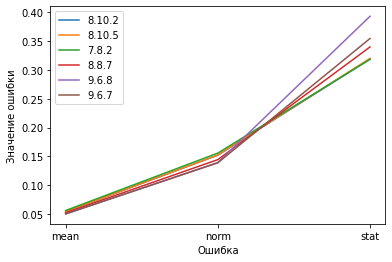

In [208]:
for i in best_models:
    plt.plot(metrics, df_metrics.iloc[i][metrics], label=models[i][0])
plt.xlabel("Ошибка")
plt.ylabel("Значение ошибки")
plt.legend()
plt.show()

In [218]:
# best_models_diff = []

In [219]:
# for i in best_models:
#     best_models_diff.append((i, models[i][2].get_diff(test)))

In [223]:
best_models

[208, 211, 120, 197, 254, 253]

In [275]:
train_diff = models[254][2].create_train_df_from_diff(test)
train_diff

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:10.303_Fomin_5,0.79,0.05,0.01,0.01,0.01,0.0,0.0,0.04,0.28
00:00:09.393_Fomin_5,0.79,0.05,0.01,0.01,0.01,0.0,0.0,0.04,0.28
00:00:10.484_Fomin_5,0.79,0.05,0.01,0.01,0.01,0.0,0.0,0.04,0.28
00:00:01.030_Korsakov_9,0.98,0.00,0.00,0.02,0.02,0.0,0.0,-0.02,0.41
00:00:00.484_Korsakov_9,0.98,0.00,0.00,0.02,0.02,0.0,0.0,-0.02,0.41
...,...,...,...,...,...,...,...,...,...
00:01:28.300_Турчина Екатерина_1,0.33,0.79,0.00,0.00,0.00,0.0,0.0,0.79,0.45
00:01:26.900_Турчина Екатерина_1,0.28,0.79,0.00,0.00,0.00,0.0,0.0,0.79,0.47
00:01:28.000_Турчина Екатерина_1,0.28,0.80,0.00,0.00,0.00,0.0,0.0,0.80,0.46


In [290]:
train_diffs = []

In [291]:
for i in best_models:
    train_df_from_diff = models[i][2].create_train_df_from_diff(test)
    set_from_diff = {entry[0] for entry in list(train_df_from_diff.groupby(by=fields))}
    train_diffs.append(set_from_diff)

In [295]:
outliers = train_diffs[0].intersection(*train_diffs[1:])
outliers

{(0.92, 0.04, 0.0, 0.01, 0.0, 0.01, 0.0, 0.03, 0.51),
 (0.59, 0.55, 0.0, 0.0, 0.0, 0.0, 0.0, 0.54, 0.44),
 (0.83, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, -0.3, 0.68),
 (0.22, 0.61, 0.0, 0.04, 0.0, 0.0, 0.0, 0.56, 0.32),
 (0.55, 0.34, 0.0, 0.01, 0.0, 0.0, 0.0, 0.34, 0.44),
 (0.65, 0.0, 0.0, 0.18, 0.05, 0.03, 0.0, -0.18, 0.6),
 (0.04, 0.0, 0.0, 0.01, 0.0, 0.0, 0.96, -0.96, 0.62),
 (0.35, 0.0, 0.02, 0.01, 0.0, 0.0, 0.64, -0.63, 0.28),
 (0.07, 0.0, 0.0, 0.0, 0.95, 0.0, 0.0, -0.0, 0.63),
 (0.06, 0.01, 0.0, 0.03, 0.0, 0.0, 0.91, -0.9, 0.42),
 (0.88, 0.21, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21, 0.27),
 (0.61, 0.0, 0.01, 0.39, 0.0, 0.0, 0.0, -0.39, 0.32),
 (0.28, 0.0, 0.05, 0.65, 0.0, 0.0, 0.0, -0.65, 0.69),
 (0.86, 0.0, 0.16, 0.13, 0.0, 0.0, 0.0, -0.24, 0.31),
 (0.71, 0.41, 0.0, 0.0, 0.0, 0.0, 0.0, 0.41, 0.49),
 (0.96, 0.01, 0.02, 0.01, 0.02, 0.0, 0.0, -0.02, 0.55),
 (0.39, 0.28, 0.03, 0.01, 0.0, 0.0, 0.0, 0.25, 0.5),
 (0.48, 0.0, 0.05, 0.54, 0.0, 0.0, 0.02, -0.54, 0.65),
 (0.79, 0.0, 0.01, 0.01, 0.22, 0.0, 0.

In [298]:
test_groupby = groupby(df)
test_groupby

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:59.600_Смолин Александр_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:01:46.100_Балакин Владислав_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:11.878_Боим_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:00.606_Керов Андрей_2,0.99,0.00,0.00,0.00,0.01,0.0,0.0,0.00,0.25
00:00:09.606_Боим_1,0.99,0.00,0.01,0.01,0.01,0.0,0.0,-0.01,0.25
...,...,...,...,...,...,...,...,...,...
00:00:17.500_Смолин Александр_1,0.02,0.96,0.00,0.00,0.00,0.0,0.0,0.96,0.90
00:00:20.900_Aleksashina_1,0.01,0.98,0.00,0.00,0.00,0.0,0.0,0.97,0.67
00:00:16.900_Смолин Александр_1,0.02,0.97,0.00,0.00,0.00,0.0,0.0,0.97,0.87


In [304]:
df_worst_metrics = pd.DataFrame(columns = ['model'] + metrics)
df_worst_metrics

,model,mean,norm,stat


In [306]:
for i in best_models:
    df_train = models[i][2].create_train_df_from_diff(test)
    entry_dict = {'model': models[i][0]}
    entry_dict.update({metric: models[i][2].model_metric(df_train, metric) for metric in metrics})
    df_worst_metrics = df_worst_metrics.append(entry_dict, ignore_index = True)

In [307]:
df_worst_metrics.mean()

,model,mean,norm,stat
0,8.10.2,0.105436,0.295817,0.315503
1,8.10.5,0.104304,0.291916,0.313669
2,7.8.2,0.105862,0.293802,0.313792
3,8.8.7,0.101151,0.279237,0.336636
4,9.6.8,0.097597,0.270529,0.392776
5,9.6.7,0.103206,0.285450,0.354948


In [297]:
# {entry[0] for entry in list(train_diffs[0].groupby(by=fields))}

In [282]:
list(train_diff.groupby(by=fields))[0][0]

(0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 1.0, -1.0, 0.63)

In [272]:
models[253][2].create_train_df_from_diff(test)

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:08.303_Fomin_5,0.79,0.05,0.01,0.01,0.01,0.0,0.0,0.04,0.28
00:00:09.121_Fomin_5,0.79,0.05,0.01,0.01,0.01,0.0,0.0,0.04,0.28
00:00:08.757_Fomin_5,0.79,0.05,0.01,0.01,0.01,0.0,0.0,0.04,0.28
00:00:11.545_Fomin_5,0.78,0.07,0.01,0.03,0.02,0.0,0.0,0.04,0.27
00:00:10.727_Fomin_5,0.78,0.07,0.01,0.03,0.02,0.0,0.0,0.04,0.27
...,...,...,...,...,...,...,...,...,...
00:01:28.400_Турчина Екатерина_1,0.35,0.78,0.00,0.00,0.00,0.0,0.0,0.78,0.45
00:01:26.800_Турчина Екатерина_1,0.29,0.78,0.00,0.00,0.00,0.0,0.0,0.78,0.47
00:01:28.300_Турчина Екатерина_1,0.33,0.79,0.00,0.00,0.00,0.0,0.0,0.79,0.45


In [273]:
models[197][2].create_train_df_from_diff(test)

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:09.151_Fomin_5,0.79,0.05,0.01,0.01,0.01,0.0,0.0,0.04,0.28
00:00:10.272_Fomin_5,0.79,0.05,0.01,0.01,0.01,0.0,0.0,0.04,0.28
00:00:08.393_Fomin_5,0.79,0.05,0.01,0.01,0.01,0.0,0.0,0.04,0.28
00:00:11.818_Fomin_5,0.78,0.07,0.01,0.03,0.02,0.0,0.0,0.04,0.27
00:00:11.424_Fomin_5,0.78,0.07,0.01,0.03,0.02,0.0,0.0,0.04,0.27
...,...,...,...,...,...,...,...,...,...
00:01:28.300_Турчина Екатерина_1,0.33,0.79,0.00,0.00,0.00,0.0,0.0,0.79,0.45
00:01:27.000_Турчина Екатерина_1,0.27,0.79,0.00,0.00,0.00,0.0,0.0,0.79,0.46
00:01:26.900_Турчина Екатерина_1,0.28,0.79,0.00,0.00,0.00,0.0,0.0,0.79,0.47


In [274]:
models[120][2].create_train_df_from_diff(test)

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:10.393_Fomin_5,0.79,0.05,0.01,0.01,0.01,0.0,0.0,0.04,0.28
00:00:10.272_Fomin_5,0.79,0.05,0.01,0.01,0.01,0.0,0.0,0.04,0.28
00:00:08.787_Fomin_5,0.79,0.05,0.01,0.01,0.01,0.0,0.0,0.04,0.28
00:00:11.727_Fomin_5,0.78,0.07,0.01,0.03,0.02,0.0,0.0,0.04,0.27
00:00:10.848_Fomin_5,0.78,0.07,0.01,0.03,0.02,0.0,0.0,0.04,0.27
...,...,...,...,...,...,...,...,...,...
00:00:19.000_Турчина Екатерина_1,0.29,0.88,0.00,0.00,0.00,0.0,0.0,0.87,0.47
00:00:16.500_Турчина Екатерина_1,0.25,0.90,0.00,0.00,0.00,0.0,0.0,0.90,0.51
00:00:10.787_Керов Андрей_2,0.05,0.93,0.00,0.00,0.00,0.0,0.0,0.93,0.46


In [236]:
diff.sort_values(by='Neutral')

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:14.500_Смолин Александр_1,-0.470577,-0.007826,0.002024,0.003872,0.175660,-0.000086,-0.001409
00:00:14.400_Смолин Александр_1,-0.469563,-0.008185,0.001485,0.002816,0.133725,-0.000174,-0.001352
00:00:14.600_Смолин Александр_1,-0.464140,-0.004977,0.002500,0.004838,0.201955,-0.000018,-0.001372
00:00:14.300_Смолин Александр_1,-0.462502,-0.001789,0.001032,0.001829,0.093549,-0.000263,-0.001209
00:00:10.100_Nasyrov_1,-0.453752,-0.000006,0.121911,-0.219253,-0.003679,0.113385,0.136045
...,...,...,...,...,...,...,...
00:00:37.700_Aleksashina_1,0.737669,-0.548425,0.012948,-0.550526,0.011431,-0.000129,-0.000561
00:00:38.200_Aleksashina_1,0.738314,-0.545472,0.014689,-0.555506,0.009055,-0.000122,-0.000652
00:00:36.700_Aleksashina_1,0.739708,-0.548000,0.016597,-0.565594,0.007985,-0.000095,-0.000257


In [260]:
error_test = df[df.Index_ == '00:00:14.500_Смолин Александр_1'][fields]
error_test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:14.500_Смолин Александр_1,0.842478,0.139869,0.00028,0.001647,0.000862,0.000201,0.00141,0.138222,0.735849


In [243]:
models[254][2].predict(error_test[fields])

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:14.500_Смолин Александр_1,0.371901,0.132043,0.002304,0.005519,0.176522,0.000114,0.000002


In [270]:
models[197][2].predict(error_test[fields])

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:14.500_Смолин Александр_1,0.445229,0.17131,0.000826,0.003695,0.116587,0.000216,2.712396e-09


In [268]:
# df[fields].sort_values(by=['Valence']).iloc[21200:21250].sort_values(by=['Arousal'])

In [183]:
df_clear.sort_values('Angry')[-30:]

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:40.100_Бушунов Виктор_1,0.08,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.75
00:00:36.400_Бушунов Виктор_1,0.02,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.81
00:01:21.700_Бушунов Виктор_1,0.05,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.63
00:01:12.900_Бушунов Виктор_1,0.04,0.0,0.0,0.97,0.0,0.0,0.01,-0.97,0.69
00:00:36.000_Бушунов Виктор_1,0.02,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.81
00:00:40.400_Бушунов Виктор_1,0.10,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.74
00:01:21.500_Бушунов Виктор_1,0.03,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.64
00:00:39.900_Бушунов Виктор_1,0.05,0.0,0.0,0.97,0.0,0.0,0.00,-0.97,0.77
00:01:16.200_Бушунов Виктор_1,0.01,0.0,0.0,0.97,0.0,0.0,0.02,-0.97,0.68


In [139]:
df_metrics.sort_values(by=['stat'])[:20]

,model,layer,N,mean,norm,stat
58,9.3,second,9.3,0.061201,0.169370,0.322718
34,6.3,second,6.3,0.059926,0.164349,0.325365
26,5.3,second,5.3,0.060070,0.166367,0.326413
11,3.4,second,3.4,0.063129,0.170932,0.326952
49,8.2,second,8.2,0.064709,0.177308,0.327401
44,7.5,second,7.5,0.065834,0.177935,0.327711
27,5.4,second,5.4,0.065860,0.177829,0.329198
3,2.4,second,2.4,0.061668,0.168450,0.329483
4,2.5,second,2.5,0.063141,0.171803,0.330382
35,6.4,second,6.4,0.063624,0.170847,0.331248


In [49]:
import matplotlib.pyplot as plt

In [50]:
x = []
y = []
for metric in metrics:
    x.append(df_metrics.index)
    y.append(df_metrics[metric])

In [51]:
y[0]

0      0.137588
1      0.062971
2      0.071391
3      0.064195
4      0.058391
         ...   
283    0.053820
284    0.052137
285    0.051378
286    0.051994
287    0.052117
Name: mean, Length: 288, dtype: float64

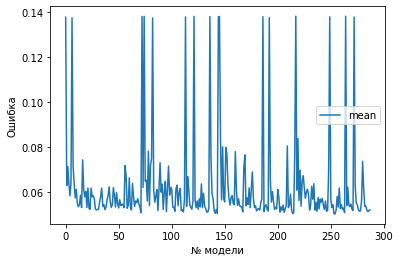

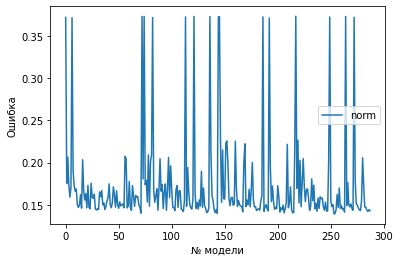

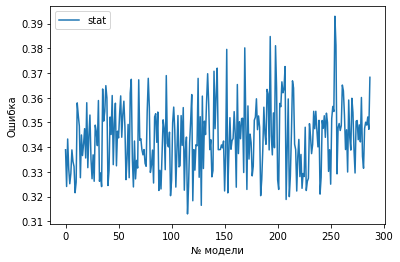

In [52]:
for i in range(len(metrics)):
    plt.plot(x[i], y[i], label=metrics[i])
    plt.xlabel("№ модели")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

### Дообучение

In [444]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [445]:
len(best_models)

113

In [449]:
list(best_models)[33]

41

In [456]:
models_2 = [models[i] for i in best_models]
models_2

[('6.2.2',
  '6.2.2',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7faa0824fb20>),
 ('6.2.3',
  '6.2.3',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7faa00191be0>),
 ('6.2.4',
  '6.2.4',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7faa00142160>),
 ('6.2.5',
  '6.2.5',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7faa00078b80>),
 ('9.7.7',
  '9.7.7',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa8406ebdc0>),
 ('6.2.8',
  '6.2.8',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa9e0609df0>),
 ('6.2.9',
  '6.2.9',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa9e07099a0>),
 ('9.7.9',
  '9.7.9',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa84085f850>),
 ('6.3.3',
  '6.3.3',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa9e049efa0>),
 ('6.3.4',
  '6.3.4',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa9c730e4c0>),
 ('6.3.8',
  '6.3.8',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa9c7732bb0>),
 ('9.8.9',
  '9.8.9',

In [457]:
len(models_2)

113

In [458]:
df_metrics_2 = pd.DataFrame(columns = ['model', 'layer', 'N'] + metrics)
df_metrics_2

,model,layer,N,mean,norm,stat


In [465]:
import NeuralNetwork as NN

In [466]:
NeuralNetwork # Треш.

NeuralNetwork.neural_network.NeuralNetwork

In [467]:
NN

<module 'NeuralNetwork' from '/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/__init__.py'>

In [471]:
NN.tools.refitting

AttributeError: module 'NeuralNetwork.tools' has no attribute 'refitting'

In [475]:
def refitting(models, test, df_metrics, df_train=None, v=1, 
              layer='first', epochs=20, batch_size=20, type_='diff'):
    for nn_tuple in models:
        nn = nn_tuple[2]
        print('refit', nn_tuple[0])
        if type_ == 'diff':
            df_train = nn.create_train_df_from_diff(test)
        elif type_ == 'split' and df_train is not None:
            pass
        else:
            raise Exception('Unknown refitting type.')
        nn.fit(df_train, epochs=epochs, batch_size=batch_size)
        entry_dict = {'model': nn_tuple[1] + f'_{v}', 'layer': layer, 'N': nn_tuple[1]}
        entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
        df_metrics = df_metrics.append(entry_dict, ignore_index = True)
        print(entry_dict)
    return df_metrics

In [476]:
v = 2
df_metrics_2 = refitting(models_2, test, df_metrics_2, v=v, layer='third')

refit 6.2.2
Epoch 1/20
323/323 [==============================] - 1s 2ms/step - loss: 0.0352
Epoch 2/20
323/323 [==============================] - 1s 2ms/step - loss: 0.0352
Epoch 3/20
323/323 [==============================] - 1s 2ms/step - loss: 0.0352
Epoch 4/20
323/323 [==============================] - 1s 2ms/step - loss: 0.0352
Epoch 5/20
323/323 [==============================] - 1s 2ms/step - loss: 0.0352
Epoch 6/20
323/323 [==============================] - 1s 2ms/step - loss: 0.0352
Epoch 7/20
323/323 [==============================] - 1s 2ms/step - loss: 0.0352
Epoch 8/20
323/323 [==============================] - 1s 2ms/step - loss: 0.0352
Epoch 9/20
323/323 [==============================] - 1s 2ms/step - loss: 0.0352
Epoch 10/20
323/323 [==============================] - 1s 2ms/step - loss: 0.0352
Epoch 11/20
323/323 [==============================] - 1s 2ms/step - loss: 0.0352
Epoch 12/20
323/323 [==============================] - 1s 2ms/step - loss: 0.0352
Epoch 13/20
3

233/233 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 15/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 16/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 17/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 18/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 19/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 20/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0143
{'model': '9.7.7_2', 'layer': 'third', 'N': '9.7.7', 'mean': 0.0805587341129187, 'norm': 0.22566225991799638, 'stat': 0.3631297}
refit 6.2.8
Epoch 1/20
317/317 [==============================] - 1s 2ms/step - loss: 0.0379
Epoch 2/20
317/317 [==============================] - 1s 2ms/step - loss: 0.0361
Epoch 3/20
317/317 [==============================] - 1s 2ms/step - loss: 0.0358
Epoch 4/20
317/317 [==============================] - 

Epoch 6/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 7/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 8/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 9/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 10/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 11/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 12/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 13/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 14/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 15/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 16/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 17/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 18/20
240/240 

234/234 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 20/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0153
{'model': '6.4.4_2', 'layer': 'third', 'N': '6.4.4', 'mean': 0.07822977081417457, 'norm': 0.22040655362769715, 'stat': 0.3442392}
refit 9.9.6
Epoch 1/20
227/227 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 2/20
227/227 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 3/20
227/227 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 4/20
227/227 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 5/20
227/227 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 6/20
227/227 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 7/20
227/227 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 8/20
227/227 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 9/20
227/227 [==============================] - 0s 2

Epoch 11/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0193
Epoch 12/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0193
Epoch 13/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 14/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 15/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 16/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 17/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 18/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 19/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 20/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0191
{'model': '6.5.2_2', 'layer': 'third', 'N': '6.5.2', 'mean': 0.08423237924160917, 'norm': 0.2325270244029514, 'stat': 0.3224352}
refit 9.9.8
Epoch 1/20
233/233 [===================

232/232 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 3/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 4/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 5/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 6/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 7/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 8/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 9/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 10/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 11/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 12/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 13/20
232/232 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 14/20
232/232 [==============

231/231 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 16/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 17/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 18/20
231/231 [==============================] - 1s 2ms/step - loss: 0.0151
Epoch 19/20
231/231 [==============================] - 1s 2ms/step - loss: 0.0151
Epoch 20/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0151
{'model': '9.10.6_2', 'layer': 'third', 'N': '9.10.6', 'mean': 0.08737924469455054, 'norm': 0.23624483268056018, 'stat': 0.34684482}
refit 6.6.5
Epoch 1/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 2/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 3/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 4/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 5/20
235/235 [==============================]

234/234 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 7/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 8/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 9/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 10/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 11/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 12/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 13/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 14/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 15/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 16/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 17/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 18/20
234/234 [==========

235/235 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 20/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0147
{'model': '6.7.9_2', 'layer': 'third', 'N': '6.7.9', 'mean': 0.06943700034415251, 'norm': 0.19457421629637736, 'stat': 0.35564685}
refit 6.8.3
Epoch 1/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 2/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 3/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 4/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 5/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 6/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 7/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 8/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 9/20
239/239 [==============================] - 0s 

230/230 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 11/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 12/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 13/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 14/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 15/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 16/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 17/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 18/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 19/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 20/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0151
{'model': '6.8.9_2', 'layer': 'third', 'N': '6.8.9', 'mean': 0.07871085375387171, 'norm': 0.21213806745113337,

233/233 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 2/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 3/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 4/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 5/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 6/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 7/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 8/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 9/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 10/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 11/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 12/20
233/233 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 13/20
233/233 [===============

239/239 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 15/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 16/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 17/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 18/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 19/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0174
Epoch 20/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0174
{'model': '6.10.6_2', 'layer': 'third', 'N': '6.10.6', 'mean': 0.0901790595803455, 'norm': 0.24536621504050982, 'stat': 0.35001913}
refit 6.10.8
Epoch 1/20
236/236 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 2/20
236/236 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 3/20
236/236 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 4/20
236/236 [==============================

235/235 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 6/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 7/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 8/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 9/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 10/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 11/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 12/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 13/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 14/20
235/235 [==============================] - 0s 1ms/step - loss: 0.0171
Epoch 15/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 16/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 17/20
235/235 [===========

293/293 [==============================] - 1s 2ms/step - loss: 0.0218
Epoch 19/20
293/293 [==============================] - 1s 2ms/step - loss: 0.0217
Epoch 20/20
293/293 [==============================] - 1s 2ms/step - loss: 0.0217
{'model': '7.3.2_2', 'layer': 'third', 'N': '7.3.2', 'mean': 0.09150159827281985, 'norm': 0.2513382380601619, 'stat': 0.322368}
refit 7.3.3
Epoch 1/20
294/294 [==============================] - 1s 2ms/step - loss: 0.0220
Epoch 2/20
294/294 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 3/20
294/294 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 4/20
294/294 [==============================] - 1s 2ms/step - loss: 0.0217
Epoch 5/20
294/294 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 6/20
294/294 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 7/20
294/294 [==============================] - 1s 2ms/step - loss: 0.0216
Epoch 8/20
294/294 [==============================] - 0s 2m

Epoch 10/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 11/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 12/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 13/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 14/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 15/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 16/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 17/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 18/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 19/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 20/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0159
{'model': '7.3.8_2', 'layer': 'third', 'N': '7.3.8', 'mean': 0.08187928383484629, 'norm': 0.219730

228/228 [==============================] - 1s 2ms/step - loss: 0.0159
Epoch 2/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 3/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 4/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 5/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 6/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 7/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 8/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 9/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 10/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 11/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 12/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 13/20
228/228 [===============

241/241 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 15/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 16/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 17/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 18/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 19/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 20/20
241/241 [==============================] - 0s 2ms/step - loss: 0.0169
{'model': '7.5.2_2', 'layer': 'third', 'N': '7.5.2', 'mean': 0.08299289797570622, 'norm': 0.22172852790595257, 'stat': 0.32220086}
refit 7.5.3
Epoch 1/20
293/293 [==============================] - 1s 2ms/step - loss: 0.0228
Epoch 2/20
293/293 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 3/20
293/293 [==============================] - 1s 2ms/step - loss: 0.0225
Epoch 4/20
293/293 [==============================] 

231/231 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 6/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 7/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 8/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 9/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 10/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 11/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 12/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 13/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 14/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 15/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 16/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 17/20
231/231 [===========

227/227 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 19/20
227/227 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 20/20
227/227 [==============================] - 0s 1ms/step - loss: 0.0151
{'model': '7.6.9_2', 'layer': 'third', 'N': '7.6.9', 'mean': 0.07868704120344773, 'norm': 0.2184200004297787, 'stat': 0.3489153}
refit 7.7.9
Epoch 1/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 2/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 3/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 4/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 5/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 6/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 7/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 8/20
231/231 [==============================] - 0s 2

Epoch 10/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 11/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 12/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 13/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 14/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 15/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 16/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 17/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 18/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 19/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 20/20
228/228 [==============================] - 0s 2ms/step - loss: 0.0153
{'model': '7.10.6_2', 'layer': 'third', 'N': '7.10.6', 'mean': 0.0722616415492928, 'norm': 0.20477

231/231 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 2/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 3/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 4/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 5/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 6/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 7/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 8/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 9/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 10/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 11/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 12/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 13/20
231/231 [===============

229/229 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 15/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 16/20
229/229 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 17/20
229/229 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 18/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 19/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 20/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0146
{'model': '8.7.9_2', 'layer': 'third', 'N': '8.7.9', 'mean': 0.08262894391371928, 'norm': 0.2295780315036106, 'stat': 0.36227247}
refit 8.8.7
Epoch 1/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 2/20
235/235 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 3/20
235/235 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 4/20
235/235 [==============================] -

230/230 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 6/20
230/230 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 7/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 8/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 9/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 10/20
230/230 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 11/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 12/20
230/230 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 13/20
230/230 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 14/20
230/230 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 15/20
230/230 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 16/20
230/230 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 17/20
230/230 [===========

234/234 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 19/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 20/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0147
{'model': '9.4.5_2', 'layer': 'third', 'N': '9.4.5', 'mean': 0.07673133219462107, 'norm': 0.21076814626589943, 'stat': 0.33463416}
refit 9.4.7
Epoch 1/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 2/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 3/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 4/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 5/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 6/20
231/231 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 7/20
231/231 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 8/20
231/231 [==============================] - 0s

227/227 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 10/20
227/227 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 11/20
227/227 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 12/20
227/227 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 13/20
227/227 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 14/20
227/227 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 15/20
227/227 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 16/20
227/227 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 17/20
227/227 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 18/20
227/227 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 19/20
227/227 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 20/20
227/227 [==============================] - 0s 1ms/step - loss: 0.0149
{'model': '9.6.7_2', 'layer'

,model,layer,N,mean,norm,stat
0,6.2.2_2,third,6.2.2,0.169141,0.450900,0.346566
1,6.2.3_2,third,6.2.3,0.079602,0.225136,0.314501
2,6.2.4_2,third,6.2.4,0.092022,0.265427,0.325132
3,6.2.5_2,third,6.2.5,0.088186,0.234775,0.321333
4,9.7.7_2,third,9.7.7,0.080559,0.225662,0.363130
...,...,...,...,...,...,...
108,9.5.8_2,third,9.5.8,0.081765,0.221935,0.344906
109,9.5.9_2,third,9.5.9,0.079148,0.213974,0.343726
110,9.6.7_2,third,9.6.7,0.087218,0.242242,0.355329
111,9.6.8_2,third,9.6.8,0.076993,0.212180,0.373004


In [492]:
# str_ = log refitting - Забыл сохранить результат в df_metrics_2

In [486]:
lines = [line for line in str_.split('\n') if line.startswith('{')]
lines

["{'model': '6.2.2_2', 'layer': 'third', 'N': '6.2.2', 'mean': 0.16914093133452188, 'norm': 0.4508998066600025, 'stat': 0.34656644}",
 "{'model': '6.2.3_2', 'layer': 'third', 'N': '6.2.3', 'mean': 0.07960151586662961, 'norm': 0.22513649475677525, 'stat': 0.31450123}",
 "{'model': '6.2.4_2', 'layer': 'third', 'N': '6.2.4', 'mean': 0.0920220418928106, 'norm': 0.2654269372600135, 'stat': 0.32513213}",
 "{'model': '6.2.5_2', 'layer': 'third', 'N': '6.2.5', 'mean': 0.08818565379456351, 'norm': 0.23477480209918672, 'stat': 0.32133308}",
 "{'model': '9.7.7_2', 'layer': 'third', 'N': '9.7.7', 'mean': 0.0805587341129187, 'norm': 0.22566225991799638, 'stat': 0.3631297}",
 "{'model': '6.2.8_2', 'layer': 'third', 'N': '6.2.8', 'mean': 0.1698533794824454, 'norm': 0.45229713300235, 'stat': 0.3467713}",
 "{'model': '6.2.9_2', 'layer': 'third', 'N': '6.2.9', 'mean': 0.09582283788653687, 'norm': 0.2556224481538028, 'stat': 0.33023018}",
 "{'model': '9.7.9_2', 'layer': 'third', 'N': '9.7.9', 'mean': 0.0

In [490]:
lines = [line.replace("'", '"') for line in lines]
lines

['{"model": "6.2.2_2", "layer": "third", "N": "6.2.2", "mean": 0.16914093133452188, "norm": 0.4508998066600025, "stat": 0.34656644}',
 '{"model": "6.2.3_2", "layer": "third", "N": "6.2.3", "mean": 0.07960151586662961, "norm": 0.22513649475677525, "stat": 0.31450123}',
 '{"model": "6.2.4_2", "layer": "third", "N": "6.2.4", "mean": 0.0920220418928106, "norm": 0.2654269372600135, "stat": 0.32513213}',
 '{"model": "6.2.5_2", "layer": "third", "N": "6.2.5", "mean": 0.08818565379456351, "norm": 0.23477480209918672, "stat": 0.32133308}',
 '{"model": "9.7.7_2", "layer": "third", "N": "9.7.7", "mean": 0.0805587341129187, "norm": 0.22566225991799638, "stat": 0.3631297}',
 '{"model": "6.2.8_2", "layer": "third", "N": "6.2.8", "mean": 0.1698533794824454, "norm": 0.45229713300235, "stat": 0.3467713}',
 '{"model": "6.2.9_2", "layer": "third", "N": "6.2.9", "mean": 0.09582283788653687, "norm": 0.2556224481538028, "stat": 0.33023018}',
 '{"model": "9.7.9_2", "layer": "third", "N": "9.7.9", "mean": 0.0

In [491]:
import json
json.loads(lines[0])

{'model': '6.2.2_2',
 'layer': 'third',
 'N': '6.2.2',
 'mean': 0.16914093133452188,
 'norm': 0.4508998066600025,
 'stat': 0.34656644}

In [494]:
for line in lines:
    df_metrics_2 = df_metrics_2.append(json.loads(line), ignore_index = True)

In [495]:
df_metrics_2

,model,layer,N,mean,norm,stat
0,6.2.2_2,third,6.2.2,0.169141,0.450900,0.346566
1,6.2.3_2,third,6.2.3,0.079602,0.225136,0.314501
2,6.2.4_2,third,6.2.4,0.092022,0.265427,0.325132
3,6.2.5_2,third,6.2.5,0.088186,0.234775,0.321333
4,9.7.7_2,third,9.7.7,0.080559,0.225662,0.363130
...,...,...,...,...,...,...
108,9.5.8_2,third,9.5.8,0.081765,0.221935,0.344906
109,9.5.9_2,third,9.5.9,0.079148,0.213974,0.343726
110,9.6.7_2,third,9.6.7,0.087218,0.242242,0.355329
111,9.6.8_2,third,9.6.8,0.076993,0.212180,0.373004


In [497]:
df_metrics_2.sort_values('mean')[:50]

,model,layer,N,mean,norm,stat
36,6.7.9_2,third,6.7.9,0.069437,0.194574,0.355647
24,9.10.8_2,third,9.10.8,0.069871,0.192484,0.344621
37,6.8.3_2,third,6.8.3,0.070508,0.201468,0.334098
65,7.3.9_2,third,7.3.9,0.070671,0.198305,0.342813
20,6.5.5_2,third,6.5.5,0.071100,0.213502,0.317291
99,8.9.6_2,third,8.9.6,0.071891,0.198164,0.352724
30,6.5.7_2,third,6.5.7,0.072066,0.201932,0.342731
87,7.10.6_2,third,7.10.6,0.072262,0.204777,0.351623
38,6.8.6_2,third,6.8.6,0.073134,0.204088,0.351007
39,6.8.7_2,third,6.8.7,0.073894,0.204120,0.331267


In [498]:
df_metrics_2.sort_values('stat')[:50]

,model,layer,N,mean,norm,stat
1,6.2.3_2,third,6.2.3,0.079602,0.225136,0.314501
66,7.4.2_2,third,7.4.2,0.083302,0.241488,0.315081
47,6.10.2_2,third,6.10.2,0.075950,0.215807,0.316456
20,6.5.5_2,third,6.5.5,0.071100,0.213502,0.317291
8,6.3.3_2,third,6.3.3,0.077091,0.213343,0.317528
9,6.3.4_2,third,6.3.4,0.084033,0.238701,0.318343
56,7.2.6_2,third,7.2.6,0.085634,0.222794,0.318749
43,6.9.3_2,third,6.9.3,0.079467,0.249663,0.319946
62,7.3.5_2,third,7.3.5,0.083677,0.233881,0.320408
33,6.7.3_2,third,6.7.3,0.088149,0.239869,0.321132


In [499]:
df_clear

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:01.300_Смолин Александр_1,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:07.575_Керов Андрей_8,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:03.000_Боим_9,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:05.700_Provotorov_3,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:09.848_Korsakov_9,0.97,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.30
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [500]:
models_2

[('6.2.2',
  '6.2.2',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7faa0824fb20>),
 ('6.2.3',
  '6.2.3',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7faa00191be0>),
 ('6.2.4',
  '6.2.4',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7faa00142160>),
 ('6.2.5',
  '6.2.5',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7faa00078b80>),
 ('9.7.7',
  '9.7.7',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa8406ebdc0>),
 ('6.2.8',
  '6.2.8',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa9e0609df0>),
 ('6.2.9',
  '6.2.9',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa9e07099a0>),
 ('9.7.9',
  '9.7.9',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa84085f850>),
 ('6.3.3',
  '6.3.3',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa9e049efa0>),
 ('6.3.4',
  '6.3.4',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa9c730e4c0>),
 ('6.3.8',
  '6.3.8',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa9c7732bb0>),
 ('9.8.9',
  '9.8.9',

In [502]:
len(models_2)

113

In [501]:
x

Index(['Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted'], dtype='object')

In [503]:
df_clear_metrics_2 = pd.DataFrame(columns = ['model'] + list(x) + metrics)
df_clear_metrics_2

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,mean,norm,stat


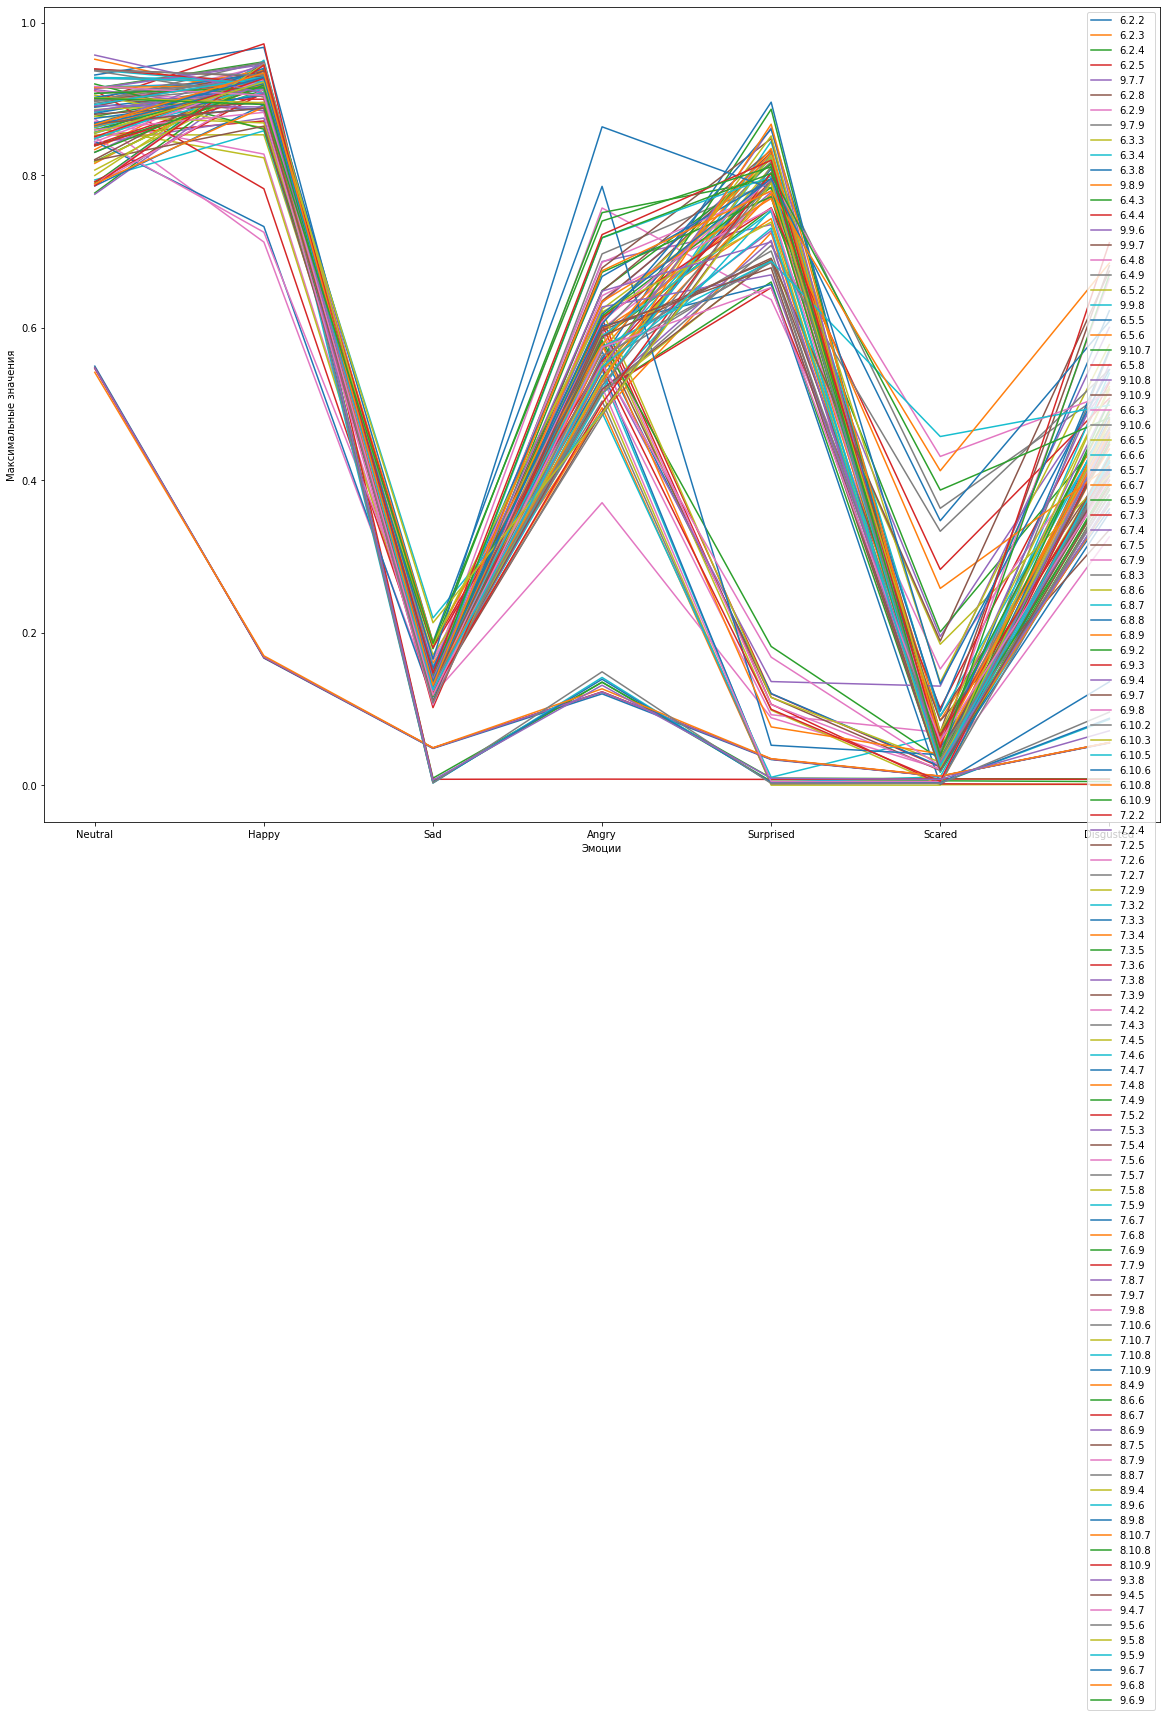

In [504]:
plt.figure(figsize=(20, 15))
for i, model_tuple in enumerate(models_2):
    values = model_tuple[2].predict(df_clear).max().values
    plt.plot(x, values, label=model_tuple[0])
    entry_dict = {'model': model_tuple[0]}
    entry_dict.update({metric: df_metrics_2.iloc[i][metric] for metric in metrics})
    entry_dict.update({emotion: values[j] for j, emotion in enumerate(x)})
    df_clear_metrics_2 = df_clear_metrics_2.append(entry_dict, ignore_index = True)
plt.xlabel("Эмоции")
plt.ylabel("Максимальные значения")
plt.legend()
plt.show()

In [524]:
df_clear_metrics.sort_values('Scared')[-11:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,mean,norm,stat
10,9.9.7,0.961022,0.921614,0.105901,0.663687,0.783989,0.092087,0.348348,0.051586,0.143904,0.349005
62,8.4.9,0.992448,0.902187,0.130918,0.658275,0.770267,0.106013,0.349670,0.051311,0.141488,0.351699
3,9.7.7,0.972760,0.930563,0.140573,0.714888,0.785160,0.109959,0.470668,0.052485,0.144391,0.365122
70,8.7.5,0.989269,0.907586,0.125115,0.666672,0.722299,0.113952,0.514801,0.051468,0.142045,0.356153
47,7.7.9,0.959390,0.905078,0.127081,0.703282,0.790263,0.160914,0.515105,0.052448,0.144735,0.361276
100,9.6.7,0.983495,0.940344,0.102627,0.669330,0.802557,0.172595,0.554978,0.050416,0.139019,0.354406
71,8.7.9,0.965326,0.961618,0.110757,0.655136,0.728304,0.259006,0.452033,0.051657,0.142614,0.361524
82,8.10.8,0.982175,0.909494,0.123550,0.705157,0.809288,0.313259,0.425297,0.050540,0.140494,0.366824
55,7.10.6,0.986265,0.925153,0.129795,0.592408,0.753001,0.362147,0.532289,0.051851,0.143968,0.370717
101,9.6.8,0.967498,0.937298,0.124065,0.730126,0.824604,0.415297,0.637826,0.050386,0.139357,0.392956


In [517]:
df_clear_metrics_2.sort_values('Scared')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,mean,norm,stat
78,7.5.8,0.806842,0.923054,0.120676,0.533448,0.825707,0.134875,0.577865,0.082954,0.230054,0.341345
36,6.7.9,0.926645,0.925778,0.152041,0.757062,0.636868,0.152332,0.458225,0.069437,0.194574,0.355647
58,7.2.9,0.904978,0.862043,0.170823,0.515417,0.690101,0.184794,0.406576,0.077753,0.218554,0.342898
95,8.7.5,0.879979,0.895501,0.123177,0.588326,0.691131,0.189017,0.674228,0.080791,0.230602,0.352455
4,9.7.7,0.841996,0.875030,0.135154,0.686795,0.735250,0.194969,0.530152,0.080559,0.225662,0.363130
22,9.10.7,0.877228,0.915737,0.140289,0.585792,0.756683,0.200952,0.466506,0.083133,0.224627,0.350210
91,8.4.9,0.867781,0.919145,0.123264,0.634211,0.769446,0.258095,0.418430,0.083031,0.231955,0.350211
83,7.7.9,0.838618,0.906331,0.101662,0.613006,0.757224,0.282945,0.507396,0.077688,0.219237,0.347643
87,7.10.6,0.907048,0.923233,0.145994,0.513932,0.707923,0.332983,0.545136,0.072262,0.204777,0.351623
110,9.6.7,0.868134,0.928522,0.135048,0.617819,0.795801,0.346853,0.608226,0.087218,0.242242,0.355329


In [525]:
df_clear_metrics.sort_values('Sad')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,mean,norm,stat
74,8.9.3,0.970909,0.958090,0.147654,0.587524,0.008563,0.006265,0.402861,0.057895,0.159875,0.322888
79,8.10.5,0.971317,0.906909,0.148008,0.535595,0.007729,0.009427,0.408667,0.054284,0.152386,0.319964
54,7.10.4,0.951834,0.934896,0.150532,0.563158,0.123878,0.035806,0.415910,0.059251,0.160626,0.327974
77,8.9.8,0.967273,0.922493,0.154884,0.700593,0.790319,0.026163,0.579727,0.051052,0.140405,0.363628
17,9.10.9,0.980976,0.933078,0.155704,0.691760,0.891243,0.051588,0.628569,0.052117,0.142763,0.368249
24,6.7.2,0.990157,0.934608,0.157898,0.525252,0.077484,0.023375,0.414912,0.058525,0.158504,0.324471
83,8.10.9,0.973292,0.929226,0.158965,0.703314,0.802793,0.031261,0.619397,0.050880,0.140440,0.363934
94,9.5.2,0.981100,0.915648,0.159202,0.472870,0.044703,0.001849,0.441755,0.056994,0.159360,0.320997
2,6.2.6,0.978866,0.917742,0.161467,0.585235,0.072355,0.043326,0.361784,0.058391,0.158985,0.325186
36,7.4.9,0.980619,0.911853,0.166144,0.791268,0.772844,0.020537,0.457293,0.051393,0.143263,0.368951


In [518]:
df_clear_metrics_2.sort_values('Sad')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,mean,norm,stat
8,6.3.3,0.852792,0.853014,0.163923,0.513741,0.000001,0.000002,0.433429,0.077091,0.213343,0.317528
26,6.6.3,0.890014,0.942944,0.164342,0.534379,0.092346,0.069020,0.458339,0.076571,0.211840,0.322045
90,7.10.9,0.874528,0.905059,0.165442,0.863503,0.782503,0.096885,0.622287,0.077609,0.220175,0.372432
56,7.2.6,0.849179,0.725196,0.166053,0.596852,0.105719,0.020468,0.464837,0.085634,0.222794,0.318749
58,7.2.9,0.904978,0.862043,0.170823,0.515417,0.690101,0.184794,0.406576,0.077753,0.218554,0.342898
72,7.4.9,0.919719,0.860354,0.178913,0.750926,0.794582,0.020624,0.503650,0.079998,0.220410,0.356118
73,7.5.2,0.939507,0.920867,0.180299,0.548338,0.099476,0.005086,0.457195,0.082993,0.221729,0.322201
68,7.4.5,0.877328,0.868656,0.181614,0.622412,0.115099,0.030002,0.460793,0.088421,0.230872,0.326634
63,7.3.6,0.791545,0.908273,0.184176,0.556006,0.792969,0.068674,0.415082,0.087042,0.243248,0.342132
98,8.9.4,0.901679,0.895166,0.184262,0.620633,0.738424,0.020699,0.522830,0.075412,0.209454,0.337752


In [526]:
df_clear_metrics_2.sort_values('Disgusted')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,mean,norm,stat
100,8.9.8,0.865204,0.920338,0.147892,0.604983,0.860582,0.132483,0.544935,0.080235,0.218848,0.352794
87,7.10.6,0.907048,0.923233,0.145994,0.513932,0.707923,0.332983,0.545136,0.072262,0.204777,0.351623
84,7.8.7,0.885154,0.913846,0.127274,0.627277,0.669327,0.057332,0.552090,0.076192,0.213678,0.352839
37,6.8.3,0.884205,0.920605,0.132409,0.554480,0.689275,0.017766,0.568737,0.070508,0.201468,0.334098
70,7.4.7,0.855570,0.940446,0.187560,0.785393,0.052312,0.039924,0.571047,0.082696,0.226918,0.340782
78,7.5.8,0.806842,0.923054,0.120676,0.533448,0.825707,0.134875,0.577865,0.082954,0.230054,0.341345
64,7.3.8,0.913428,0.945198,0.152388,0.554321,0.135861,0.129897,0.600476,0.081879,0.219731,0.331771
110,9.6.7,0.868134,0.928522,0.135048,0.617819,0.795801,0.346853,0.608226,0.087218,0.242242,0.355329
90,7.10.9,0.874528,0.905059,0.165442,0.863503,0.782503,0.096885,0.622287,0.077609,0.220175,0.372432
86,7.9.8,0.859442,0.882509,0.105399,0.641882,0.756085,0.052811,0.664369,0.077703,0.220931,0.354555


In [527]:
df_clear_metrics_2.sort_values('Angry')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,mean,norm,stat
80,7.6.7,0.868791,0.888390,0.152978,0.667267,0.794104,0.049280,0.362188,0.077503,0.215847,0.357266
82,7.6.9,0.859476,0.919461,0.119260,0.672722,0.771788,0.035604,0.394705,0.078687,0.218420,0.348915
111,9.6.8,0.866318,0.934157,0.131189,0.674698,0.779506,0.412386,0.684736,0.076993,0.212180,0.373004
85,7.9.7,0.819447,0.864375,0.129795,0.678400,0.847942,0.041397,0.446266,0.085653,0.235458,0.358061
46,6.9.8,0.910183,0.893355,0.133784,0.685746,0.778886,0.026883,0.469393,0.082615,0.224006,0.363681
4,9.7.7,0.841996,0.875030,0.135154,0.686795,0.735250,0.194969,0.530152,0.080559,0.225662,0.363130
7,9.7.9,0.894374,0.926988,0.119337,0.696853,0.790727,0.043331,0.411911,0.083057,0.224719,0.361077
89,7.10.8,0.848259,0.924111,0.134330,0.717788,0.798120,0.023355,0.460574,0.081890,0.222853,0.366421
102,8.10.8,0.907425,0.914718,0.138484,0.718137,0.802387,0.387045,0.481962,0.078757,0.215446,0.359807
103,8.10.9,0.850469,0.927160,0.147012,0.722132,0.819635,0.049239,0.711572,0.075935,0.209592,0.360203


In [528]:
df_clear_metrics_2.sort_values('Neutral')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,mean,norm,stat
49,6.10.5,0.916042,0.919330,0.219306,0.488476,0.010289,0.065224,0.479262,0.074060,0.219769,0.323280
106,9.4.7,0.916448,0.904807,0.118168,0.574489,0.652683,0.057692,0.400619,0.075773,0.218140,0.342985
72,7.4.9,0.919719,0.860354,0.178913,0.750926,0.794582,0.020624,0.503650,0.079998,0.220410,0.356118
36,6.7.9,0.926645,0.925778,0.152041,0.757062,0.636868,0.152332,0.458225,0.069437,0.194574,0.355647
99,8.9.6,0.927366,0.922374,0.137026,0.574805,0.687361,0.457277,0.498432,0.071891,0.198164,0.352724
25,9.10.9,0.928012,0.921217,0.121726,0.610461,0.830307,0.069730,0.681284,0.075136,0.204608,0.355913
39,6.8.7,0.928191,0.926161,0.122751,0.512296,0.754984,0.021639,0.393395,0.073894,0.204120,0.331267
10,6.3.8,0.931454,0.967778,0.138254,0.568656,0.120176,0.024892,0.411390,0.088994,0.234863,0.325438
97,8.8.7,0.936914,0.902835,0.107902,0.563296,0.685530,0.044991,0.368401,0.075292,0.212242,0.343126
107,9.5.6,0.937422,0.931053,0.131012,0.524137,0.792736,0.034449,0.417042,0.078011,0.209237,0.338458


In [529]:
best_models_2 = set()

In [530]:
for emotion in seven_fields:
    best_models_2 = best_models_2.union(df_clear_metrics_2.sort_values(emotion)[-15:].index)

In [532]:
len(best_models_2)

72

In [536]:
df_metrics_2.sort_values('mean')[:50]

,model,layer,N,mean,norm,stat
36,6.7.9_2,third,6.7.9,0.069437,0.194574,0.355647
24,9.10.8_2,third,9.10.8,0.069871,0.192484,0.344621
37,6.8.3_2,third,6.8.3,0.070508,0.201468,0.334098
65,7.3.9_2,third,7.3.9,0.070671,0.198305,0.342813
20,6.5.5_2,third,6.5.5,0.071100,0.213502,0.317291
99,8.9.6_2,third,8.9.6,0.071891,0.198164,0.352724
30,6.5.7_2,third,6.5.7,0.072066,0.201932,0.342731
87,7.10.6_2,third,7.10.6,0.072262,0.204777,0.351623
38,6.8.6_2,third,6.8.6,0.073134,0.204088,0.351007
39,6.8.7_2,third,6.8.7,0.073894,0.204120,0.331267


In [537]:
best_models_2 = best_models_2.union(df_metrics_2.sort_values('mean')[:50].index)

In [538]:
len(best_models_2)

88

In [539]:
best_models_2 = best_models_2.union(df_metrics_2.sort_values('norm')[:50].index)

In [540]:
len(best_models_2)

89

In [553]:
dir_path = '../saved_models/third/_2'
save_name = 'model_third_'
path = os.path.join(dir_path, save_name)
path

'../saved_models/third/_2/model_third_'

In [554]:
len(models_2) # Все, которые дообучали во 2 этапе

113

In [555]:
models_2

[('6.2.2',
  '6.2.2',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7faa0824fb20>),
 ('6.2.3',
  '6.2.3',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7faa00191be0>),
 ('6.2.4',
  '6.2.4',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7faa00142160>),
 ('6.2.5',
  '6.2.5',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7faa00078b80>),
 ('9.7.7',
  '9.7.7',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa8406ebdc0>),
 ('6.2.8',
  '6.2.8',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa9e0609df0>),
 ('6.2.9',
  '6.2.9',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa9e07099a0>),
 ('9.7.9',
  '9.7.9',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa84085f850>),
 ('6.3.3',
  '6.3.3',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa9e049efa0>),
 ('6.3.4',
  '6.3.4',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa9c730e4c0>),
 ('6.3.8',
  '6.3.8',
  <NeuralNetwork.neural_network.NeuralNetwork at 0x7fa9c7732bb0>),
 ('9.8.9',
  '9.8.9',

In [556]:
v

2

In [557]:
path + models_2[0][0] + f'_{v}'

'../saved_models/third/_2/model_third_6.2.2_2'

In [558]:
for model_tuple in models_2:
    nn = model_tuple[2]
    cur_path = path + model_tuple[0] + f'_{v}'
    nn.model.save(cur_path)

INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_6.2.2_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_6.2.3_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_6.2.4_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_6.2.5_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_9.7.7_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_6.2.8_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_6.2.9_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_9.7.9_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_6.3.3_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_6.3.4_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_6.3.8_2/assets
INFO:tensorflow:Assets written to: ../saved

INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_8.7.5_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_8.7.9_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_8.8.7_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_8.9.4_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_8.9.6_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_8.9.8_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_8.10.7_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_8.10.8_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_8.10.9_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_9.3.8_2/assets
INFO:tensorflow:Assets written to: ../saved_models/third/_2/model_third_9.4.5_2/assets
INFO:tensorflow:Assets written to: ../sa

In [559]:
name_db = 'df_metrics'
db_path = f'../model_metrics/{name_db}_third_second_half_{v}.db'
db_path

'../model_metrics/df_metrics_third_second_half_2.db'

In [560]:
df_metrics_2

,model,layer,N,mean,norm,stat
0,6.2.2_2,third,6.2.2,0.169141,0.450900,0.346566
1,6.2.3_2,third,6.2.3,0.079602,0.225136,0.314501
2,6.2.4_2,third,6.2.4,0.092022,0.265427,0.325132
3,6.2.5_2,third,6.2.5,0.088186,0.234775,0.321333
4,9.7.7_2,third,9.7.7,0.080559,0.225662,0.363130
...,...,...,...,...,...,...
108,9.5.8_2,third,9.5.8,0.081765,0.221935,0.344906
109,9.5.9_2,third,9.5.9,0.079148,0.213974,0.343726
110,9.6.7_2,third,9.6.7,0.087218,0.242242,0.355329
111,9.6.8_2,third,9.6.8,0.076993,0.212180,0.373004


In [561]:
save_to_db(db_path, name_db, df_metrics_2)

In [562]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,layer,N,mean,norm,stat
0,6.2.2_2,third,6.2.2,0.169140931334522,0.450899806660003,0.34656644
1,6.2.3_2,third,6.2.3,0.0796015158666296,0.225136494756775,0.31450123
2,6.2.4_2,third,6.2.4,0.0920220418928106,0.265426937260013,0.32513213
3,6.2.5_2,third,6.2.5,0.0881856537945635,0.234774802099187,0.32133308
4,9.7.7_2,third,9.7.7,0.0805587341129187,0.225662259917996,0.3631297
...,...,...,...,...,...,...
108,9.5.8_2,third,9.5.8,0.0817649262928287,0.221935240128355,0.34490559
109,9.5.9_2,third,9.5.9,0.0791477330628304,0.213974193760906,0.34372628
110,9.6.7_2,third,9.6.7,0.0872182703109926,0.242241619518167,0.35532886
111,9.6.8_2,third,9.6.8,0.0769927523455968,0.212180111599617,0.37300402


In [187]:
df_metrics.iloc[-(n // v):]

,model,layer,N,mean,norm,stat
64,2.2_2,second,2.2,0.170399,0.454005,0.346885
65,2.3_2,second,2.3,0.080917,0.225413,0.330862
66,2.4_2,second,2.4,0.081034,0.218515,0.317491
67,2.5_2,second,2.5,0.080814,0.220195,0.318561
68,2.6_2,second,2.6,0.084744,0.230460,0.325103
...,...,...,...,...,...,...
123,9.5_2,second,9.5,0.084396,0.227250,0.339019
124,9.6_2,second,9.6,0.075379,0.210158,0.342961
125,9.7_2,second,9.7,0.078430,0.217834,0.336958
126,9.8_2,second,9.8,0.075777,0.210268,0.318714


In [195]:
metrics

['mean', 'norm', 'stat']

In [193]:
x = []
y = []
for metric in metrics:
    x.append(df_metrics[-(n // v):].index)
    y.append(df_metrics[-(n // v):][metric])

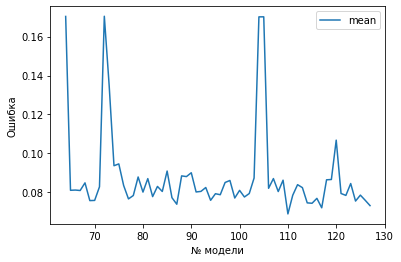

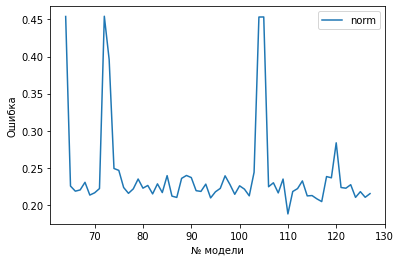

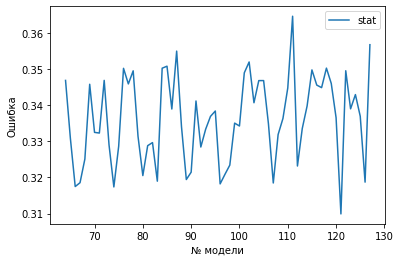

In [194]:
for i in range(len(metrics)):
    plt.plot(x[i], y[i], label=metrics[i])
    plt.xlabel("№ модели")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

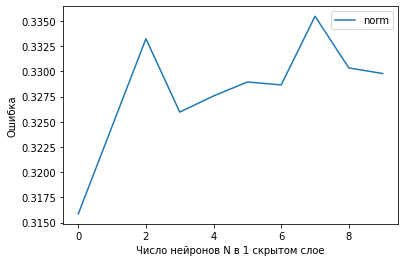

In [353]:
i = 1
plt.plot(x[i], y[i], label=metrics[i])
plt.xlabel("Число нейронов N в 1 скрытом слое")
plt.ylabel("Ошибка")
plt.legend()
plt.show()

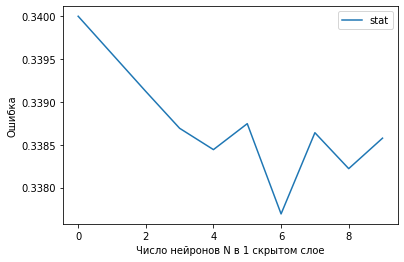

In [354]:
i = 2
plt.plot(x[i], y[i], label=metrics[i])
plt.xlabel("Число нейронов N в 1 скрытом слое")
plt.ylabel("Ошибка")
plt.legend()
plt.show()

In [355]:
full_df_list

[                                  Neutral  Happy   Sad  Angry  Surprised  \
 Index_                                                                     
 00:01:48.200_Бондаренко Денис_2      0.99   0.00  0.00   0.00       0.01   
 00:01:43.700_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
 00:01:36.500_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
 00:00:01.151_Керов Андрей_4          0.99   0.00  0.00   0.00       0.01   
 00:00:07.969_Боим_1                  0.99   0.00  0.01   0.01       0.01   
 ...                                   ...    ...   ...    ...        ...   
 00:00:17.500_Смолин Александр_1      0.02   0.96  0.00   0.00       0.00   
 00:00:20.900_Aleksashina_1           0.01   0.98  0.00   0.00       0.00   
 00:00:16.900_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
 00:00:17.000_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
 00:00:15.000_Aleksashina_1           0.01   0.99  0.00   0.00       0.00   

In [356]:
percent_df_list

[                             Neutral  Happy  Sad  Angry  Surprised  Scared  \
 Index_                                                                       
 00:00:00.030_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.060_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.090_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.121_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.151_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 ...                              ...    ...  ...    ...        ...     ...   
 00:00:11.696_Fomin_6            0.05   0.93  0.0    0.0       0.00     0.0   
 00:00:04.060_Керов Андрей_2     0.04   0.94  0.0    0.0       0.00     0.0   
 00:00:11.878_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
 00:00:11.939_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
 00:00:13.100_Aleksashina_1      0.02   0.97  0.0   

In [357]:
df_train, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:01:32.000_Лебедев Андрей_1,0.97,0.00,0.01,0.02,0.01,0.0,0.00,-0.02,0.27
00:00:01.484_Korsakov_4,0.98,0.00,0.01,0.01,0.01,0.0,0.00,-0.01,0.28
00:01:16.400_Бондаренко Денис_2,0.98,0.00,0.00,0.01,0.01,0.0,0.00,-0.01,0.29
00:00:06.606_Fomin_10,0.19,0.70,0.00,0.00,0.00,0.0,0.00,0.70,0.49
00:00:10.363_Fomin_2,0.35,0.48,0.00,0.01,0.00,0.0,0.00,0.48,0.44
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [358]:
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [360]:
v = 3
for nn_tuple in models:
    nn = nn_tuple[2]
    print('refit', nn_tuple[0])
    nn.fit(df_train, epochs=5, batch_size=20)
    entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

refit 0
Epoch 1/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 2/5
916/916 [==============================] - 1s 2ms/step - loss: 0.0141
Epoch 3/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 4/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 5/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
{'model': '0_3', 'layer': 'first', 'N': 0, 'mean': 0.0959071129377366, 'norm': 0.24791768498914118, 'stat': 0.3541207}
refit 2
Epoch 1/5
916/916 [==============================] - 1s 2ms/step - loss: 0.0148
Epoch 2/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0142
Epoch 3/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 4/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 5/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
{'model': '2_3', 'layer': 'first', 'N': 2, 'mean': 0.096588200364

In [361]:
n = len(df_metrics)

In [364]:
df_metrics[-(n // v):]

,model,layer,N,mean,norm,stat
18,0_3,first,0,0.095907,0.247918,0.354121
19,2_3,first,2,0.096588,0.249002,0.354194
20,3_3,first,3,0.097574,0.251960,0.354712
21,4_3,first,4,0.096608,0.249021,0.353808
22,5_3,first,5,0.097895,0.252508,0.354489
23,6_3,first,6,0.098362,0.253834,0.355203
24,7_3,first,7,0.095710,0.247515,0.353197
25,8_3,first,8,0.098927,0.255028,0.354929
26,9_3,first,9,0.096643,0.249511,0.353122


In [362]:
x = []
y = []
for metric in metrics:
    x.append(df_metrics[-(n // v):]['N'])
    y.append(df_metrics[-(n // v):][metric])

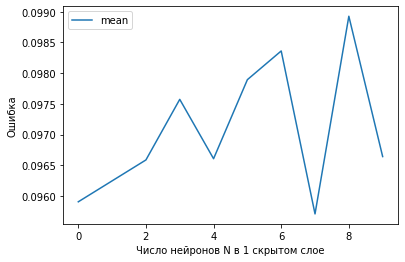

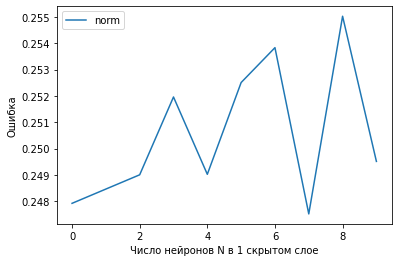

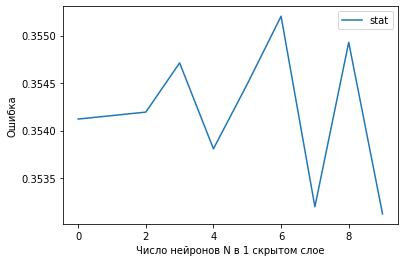

In [369]:
for i in range(len(metrics)):
    plt.plot(x[i], y[i], label=metrics[i])
    plt.xlabel("Число нейронов N в 1 скрытом слое")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

In [367]:
import os

In [374]:
df_metrics[-(n // v):].loc[24:25]

,model,layer,N,mean,norm,stat
24,7_3,first,7,0.095710,0.247515,0.353197
25,8_3,first,8,0.098927,0.255028,0.354929


In [375]:
path = '../saved_models/model_first_7_3'
path

'../saved_models/model_first_7_3'

In [376]:
models

[('0', 0, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe13bfcc8b0>),
 ('2', 2, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe1400ede50>),
 ('3', 3, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe13bdb6d00>),
 ('4', 4, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe1402d4d00>),
 ('5', 5, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe140ae8eb0>),
 ('6', 6, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe13bf2a2b0>),
 ('7', 7, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe143b4e910>),
 ('8', 8, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe13bd12490>),
 ('9', 9, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe1380e9430>)]

In [377]:
models[-3]

('7', 7, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fe143b4e910>)

In [379]:
models[-3][2].model.save(path)

INFO:tensorflow:Assets written to: ../saved_models/model_first_7_3/assets


In [380]:
v = 4
for nn_tuple in models:
    nn = nn_tuple[2]
    print('refit', nn_tuple[0])
    df_train = nn.create_train_df_from_diff(test)
    nn.fit(df_train, epochs=5, batch_size=20)
    entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

refit 0
Epoch 1/5
295/295 [==============================] - 0s 1ms/step - loss: 0.0231
Epoch 2/5
295/295 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 3/5
295/295 [==============================] - 0s 1ms/step - loss: 0.0223
Epoch 4/5
295/295 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 5/5
295/295 [==============================] - 0s 1ms/step - loss: 0.0220
{'model': '0_4', 'layer': 'first', 'N': 0, 'mean': 0.12436357350194925, 'norm': 0.3200826691446303, 'stat': 0.3429236}
refit 2
Epoch 1/5
296/296 [==============================] - 0s 1ms/step - loss: 0.0230
Epoch 2/5
296/296 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 3/5
296/296 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 4/5
296/296 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 5/5
296/296 [==============================] - 0s 1ms/step - loss: 0.0220
{'model': '2_4', 'layer': 'first', 'N': 2, 'mean': 0.121168107746

In [382]:
n = len(df_metrics)

In [383]:
x = []
y = []
for metric in metrics:
    x.append(df_metrics[-(n // v):]['N'])
    y.append(df_metrics[-(n // v):][metric])

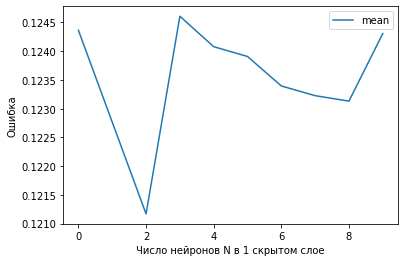

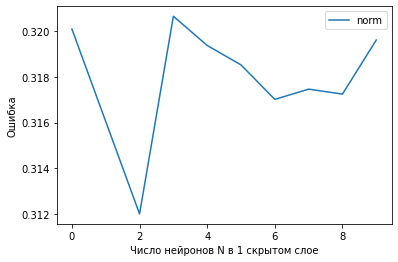

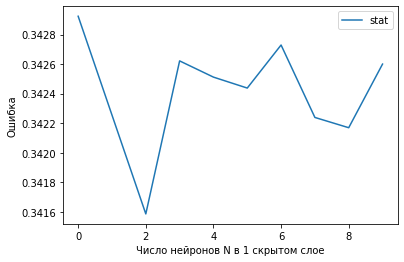

In [384]:
for i in range(len(metrics)):
    plt.plot(x[i], y[i], label=metrics[i])
    plt.xlabel("Число нейронов N в 1 скрытом слое")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

In [388]:
df_train, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:01:48.300_Бондаренко Денис_2,0.99,0.00,0.00,0.00,0.01,0.0,0.00,-0.00,0.25
00:00:01.600_Боим_7,0.99,0.00,0.01,0.02,0.01,0.0,0.00,-0.02,0.14
00:00:32.400_Бондаренко Денис_2,0.96,0.00,0.02,0.04,0.01,0.0,0.00,-0.04,0.29
00:00:05.939_Fomin_6,0.94,0.02,0.02,0.04,0.01,0.0,0.00,-0.03,0.27
00:00:09.484_Korsakov_1,0.85,0.00,0.02,0.06,0.03,0.0,0.01,-0.07,0.33
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [389]:
v = 5
for nn_tuple in models:
    nn = nn_tuple[2]
    print('refit', nn_tuple[0])
    nn.fit(df_train, epochs=5, batch_size=20)
    entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

refit 0
Epoch 1/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0145
Epoch 2/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0142
Epoch 3/5
916/916 [==============================] - 1s 2ms/step - loss: 0.0141
Epoch 4/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 5/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
{'model': '0_5', 'layer': 'first', 'N': 0, 'mean': 0.09712630229637173, 'norm': 0.2506625007648664, 'stat': 0.3543298}
refit 2
Epoch 1/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0145
Epoch 2/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0142
Epoch 3/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 4/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 5/5
916/916 [==============================] - 2s 2ms/step - loss: 0.0141
{'model': '2_5', 'layer': 'first', 'N': 2, 'mean': 0.097165067938

In [390]:
n = len(df_metrics)

In [394]:
metrics

['mean', 'norm', 'stat']

In [396]:
x = [[] for _ in range(len(metrics))]
y = [[] for _ in range(len(metrics))]

In [399]:
for i, metric in enumerate(metrics):
    x[i].append(df_metrics[4 * (n // v):]['N'])
    y[i].append(df_metrics[4 * (n // v):][metric])

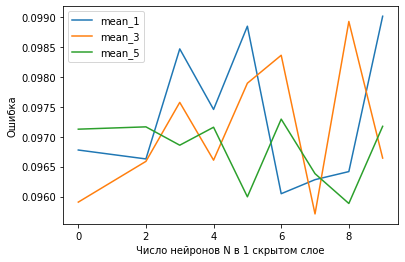

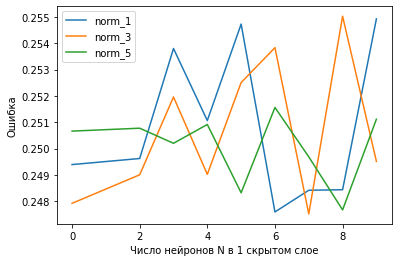

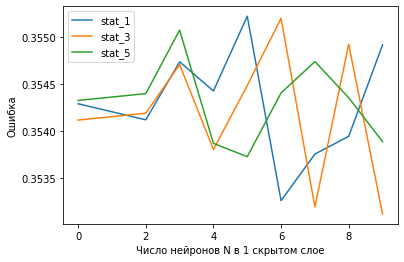

In [401]:
for i in range(len(metrics)):
    for j in range(len(x[i])):
        plt.plot(x[i][j], y[i][j], label=metrics[i] + f'_{j * 2 + 1}')
    plt.xlabel("Число нейронов N в 1 скрытом слое")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

### Разработка функции apply_float() для NN.tools модуля

In [71]:
def apply_float(df_, columns):
    for field in columns:
        df_[field] = df_[field].apply(lambda el: float(el))

### Использование функции apply_float()

In [72]:
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [77]:
apply_float(df, fields)

In [78]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.940782,0.000023,0.023035,0.056517,0.019016,0.000197,0.000878,-0.056494,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [79]:
df['Neutral']

0        0.987859
1        0.987882
2        0.987905
3        0.987929
4        0.988026
           ...   
20842    0.931563
20843    0.935643
20844    0.938411
20845    0.940782
20846    0.942106
Name: Neutral, Length: 25321, dtype: float64

In [80]:
df['Action_Unit_12___Right___Lip_Corner_Puller']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
20842    0.0
20843    0.0
20844    0.0
20845    0.0
20846    0.0
Name: Action_Unit_12___Right___Lip_Corner_Puller, Length: 25321, dtype: object

### Разработка функции make_valid_df() для NN.tools модуля

In [17]:
def make_valid_df(df_, columns=None):
    if columns is not None:
        apply_float(df_, columns)
    df_.index = df_['Index_']

In [82]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.940782,0.000023,0.023035,0.056517,0.019016,0.000197,0.000878,-0.056494,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [84]:
make_valid_df(df, fields)

In [85]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
